# ALE Plots Generation

In [90]:
import alibi
from alibi.explainers import ALE, plot_ale
from alibi.explainers import PartialDependence
from alibi.explainers import plot_pd
from alibi.explainers import TreePartialDependence

import numpy as np
import pandas as pd
import os 
import sys
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import root_mean_squared_error, mean_squared_error
from scipy.stats import gaussian_kde
from sklearn.ensemble import RandomForestRegressor

import seaborn as sns
sns.set()
sns.set_style("whitegrid") 
sns.set_context("paper")

from joblib import load
from pygam import LinearGAM
from matplotlib.patches import Rectangle

In [3]:
ordered_veg_list = ['Desert Forb',                 'Desert Chenopod', 'Desert Hummock.grass',
                    'Desert Tree.Palm',            'Desert Shrub',    'Desert Tussock.grass',
                    'Temp/Med Tree.Palm',          'Temp/Med Shrub',  'Temp/Med Tussock.grass',
                    'Tropical/Savanna Tree.Palm',  'Tropical/Savanna Tussock.grass']

In [29]:
results_dir = 'C:/Users/krish/Desktop/DYNAMIC MODEL VEGETATION PROJECT/au_dyanamic_vegetation_project/RESULTS/Random_Forest_Results_On_Super_Group_Results_new'
directory = 'C:/Users/krish/Desktop/DYNAMIC MODEL VEGETATION PROJECT/au_dyanamic_vegetation_project/DATASETS/MODELLED_TRAINING_DATA'
plots_dir = 'C:/Users/krish/Desktop/DYNAMIC MODEL VEGETATION PROJECT/Thesis/Plots_For_Thesis/Chapter 3'

In [4]:
targeted_group = ['Tropical/Savanna Tussock.grass']
features_included = dict()
max_counter = 10
for counter, s in enumerate(targeted_group):
    
    print(f'Obtaining results from {s} sites ({counter + 1}/{max_counter})')
    super_group_folder_name = '_'.join(s.split('/')) 
    directory_val = f'{directory}/{super_group_folder_name}/Validation' 
    number_of_folds = len(os.listdir(directory_val)) # note; this assumes that each folder in this directory is a K-Fold
    
    training_set = pd.read_csv(f'{directory}/{super_group_folder_name}/Training/{super_group_folder_name}_Train_Set.csv', 
                               index_col = ['time'], parse_dates = ['time']).copy()
    test_set = pd.read_csv(f'{directory}/{super_group_folder_name}/Test/{super_group_folder_name}_Test_Set.csv',
                               index_col = ['time'], parse_dates = ['time']).copy()
    
    for i in range(number_of_folds):
        folder_num = i+1
        
        print(f'Load the random forest ({folder_num}/{number_of_folds})')
        rf_model = load(f'{results_dir}/{super_group_folder_name}/Results/KFold_{folder_num}/Random_Forest.joblib')
        break
    

Obtaining results from Tropical/Savanna Tussock.grass sites (1/10)
Load the random forest (1/10)


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

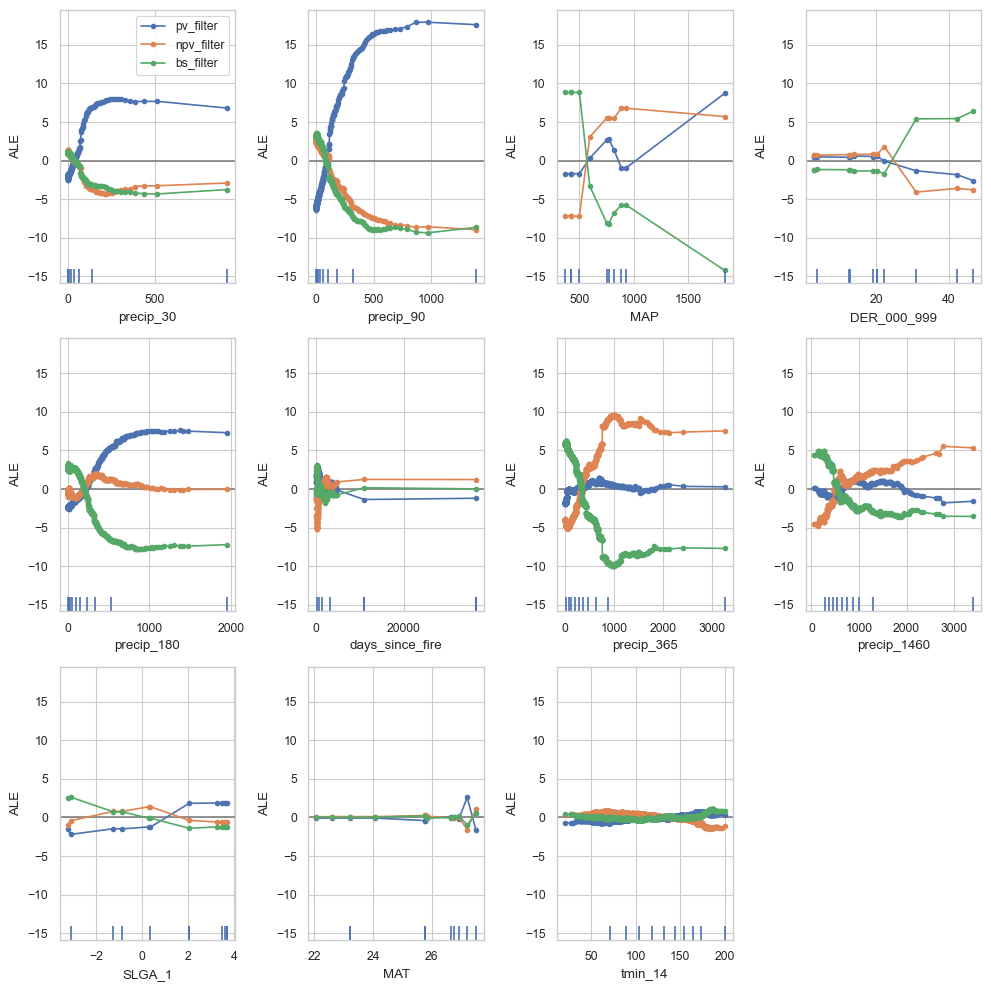

In [24]:
TARGET = ['pv_filter', 'npv_filter', 'bs_filter']
features_in = rf_model.feature_names_in_
rf_ale = ALE(rf_model.predict, feature_names= features_in, target_names=TARGET)
rf_exp = rf_ale.explain(np.array(test_set[features_in]))
plot_ale(rf_exp, n_cols=4, fig_kw={'figwidth':10, 'figheight': 10});

In [ ]:
# Now repeat with 5 models 

In [47]:
targeted_group = ['Tropical/Savanna Tussock.grass']
TARGET = ['pv_filter', 'npv_filter', 'bs_filter']
features_included = dict()
max_counter = 10
for counter, s in enumerate(targeted_group):
    
    print(f'Obtaining results from {s} sites ({counter + 1}/{max_counter})')
    super_group_folder_name = '_'.join(s.split('/')) 
    directory_val = f'{directory}/{super_group_folder_name}/Validation' 
    number_of_folds = len(os.listdir(directory_val)) # note; this assumes that each folder in this directory is a K-Fold
    
    training_set = pd.read_csv(f'{directory}/{super_group_folder_name}/Training/{super_group_folder_name}_Train_Set.csv', 
                               index_col = ['time'], parse_dates = ['time']).copy()
    test_set = pd.read_csv(f'{directory}/{super_group_folder_name}/Test/{super_group_folder_name}_Test_Set.csv',
                               index_col = ['time'], parse_dates = ['time']).copy()
    
    for i in range(number_of_folds):
        folder_num = i+1
        
        print(f'Load the random forest ({folder_num}/{number_of_folds})')
        rf_model = load(f'{results_dir}/{super_group_folder_name}/Results/KFold_{folder_num}/Random_Forest.joblib')
        
        features_in = rf_model.feature_names_in_
        rf_ale = ALE(rf_model.predict, feature_names= features_in, target_names=TARGET)
        rf_exp = rf_ale.explain(np.array(test_set[features_in]))
        print(rf_exp)
        #plot_ale(rf_exp, n_cols=4, fig_kw={'figwidth':10, 'figheight': 10});
        #plt.show()
        break

Obtaining results from Tropical/Savanna Tussock.grass sites (1/10)
Load the random forest (1/10)


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Explanation(meta={
  'name': 'ALE',
  'type': ['blackbox'],
  'explanations': ['global'],
  'params': {
              'check_feature_resolution': True,
              'low_resolution_threshold': 10,
              'extrapolate_constant': True,
              'extrapolate_constant_perc': 10.0,
              'extrapolate_constant_min': 0.1,
              'min_bin_points': 4}
            ,
  'version': '0.9.6'}
, data={
  'ale_values': [array([[-1.85639576e+00,  1.07922623e+00,  7.82201567e-01],
       [-1.85540059e+00,  1.09778106e+00,  7.64250882e-01],
       [-1.85050145e+00,  1.07384245e+00,  7.83204730e-01],
       [-1.83213440e+00,  1.06487434e+00,  7.73909825e-01],
       [-1.82403084e+00,  1.07726831e+00,  7.53253327e-01],
       [-1.81635214e+00,  1.07380638e+00,  7.49213429e-01],
       [-1.81823048e+00,  1.06723844e+00,  7.57732591e-01],
       [-1.81624537e+00,  1.06350097e+00,  7.59730270e-01],
       [-1.80958304e+00,  1.06381726e+00,  7.52716709e-01],
       [-1.81754007e+00, 

C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


## Now A program that will generate the datafile files per vegetation group

In [139]:
targeted_group = ordered_veg_list
TARGET = ['pv_filter', 'npv_filter', 'bs_filter']
features_included = dict()
max_counter = 10

for counter, s in enumerate(targeted_group):
    
    print(f'Obtaining results from {s} sites ({counter + 1}/{max_counter})')
    
    super_group_folder_name = '_'.join(s.split('/')) 
    directory_val = f'{directory}/{super_group_folder_name}/Validation' 
    number_of_folds = len(os.listdir(directory_val)) # note; this assumes that each folder in this directory is a K-Fold
    
    training_set = pd.read_csv(f'{directory}/{super_group_folder_name}/Training/{super_group_folder_name}_Train_Set.csv', 
                               index_col = ['time'], parse_dates = ['time']).copy()
    test_set = pd.read_csv(f'{directory}/{super_group_folder_name}/Test/{super_group_folder_name}_Test_Set.csv',
                           index_col = ['time'], parse_dates = ['time']).copy()
    
    ALE_all_models = []
    
    for i in range(number_of_folds):
            
        folder_num = i+1
        print(f'Load the random forest ({folder_num}/{number_of_folds})')
        
        rf_model = load(f'{results_dir}/{super_group_folder_name}/Results/KFold_{folder_num}/Random_Forest.joblib')
        
        features_in = rf_model.feature_names_in_
        print(features_in)
        
        rf_ale = ALE(rf_model.predict, feature_names= features_in, target_names=TARGET)
        rf_exp = rf_ale.explain(np.array(test_set[features_in]))

        features_in_list = list(features_in)
        to_index = []
        for feat in features_in_list:
            d = feat + '_feat_values'
            to_index.append(feat)
            to_index.append(d)

        ALE_data_frames_list = []

        for target_index in range(3):
            ALE_values_column = [] 
            for feat in features_in_list:
                ale_values = rf_exp['data']['ale_values'][features_in_list.index(feat)][:,target_index]
                ale_feature_values = rf_exp['data']['feature_values'][features_in_list.index(feat)]
                ALE_values_column.append(ale_values)
                ALE_values_column.append(ale_feature_values)

            temp_df = pd.DataFrame(ALE_values_column, index = to_index).T
            temp_df['Target'] = TARGET[target_index]
            ALE_data_frames_list.append(temp_df)

        ALE_data_frame = pd.concat(ALE_data_frames_list)
        ALE_data_frame['Model'] = folder_num
        
        ALE_all_models.append(ALE_data_frame)
    ALE_all_models_df = pd.concat(ALE_all_models)
    ALE_all_models_df.to_csv(f'{results_dir}/Results_Visualisation/ALE_values_{super_group_folder_name}.csv')

Obtaining results from Desert Forb sites (1/10)
Load the random forest (1/10)
['MAP' 'CO2' 'MAT' 'precip_90' 'tmax_14' 'days_since_fire' 'precip_365'
 'SLGA_3' 'aspect_1s' 'tmax_lag' 'precip_180' 'precip_30'
 'photoperiod_gradient' 'SLGA_1']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (2/10)
['MAP' 'CO2' 'MAT' 'VPD_30' 'DER_000_999' 'precip_90' 'precip_180'
 'aspect_1s' 'precip_365' 'precip_30' 'VPD_7' 'tmax_30']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (3/10)
['MAP' 'CO2' 'SLGA_1' 'VPD_30' 'precip_90' 'MAT' 'photoperiod_gradient'
 'days_since_fire']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (4/10)
['MAP' 'CO2' 'MAT' 'VPD_14' 'precip_365' 'SLGA_3' 'days_since_fire'
 'SLGA_1' 'VPD_7' 'SLGA_2' 'tmax_7' 'VPD_lag']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (5/10)
['MAP' 'CO2' 'MAT' 'VPD_30' 'days_since_fire' 'VPD_14' 'tmin_30'
 'precip_1460' 'tmax_14' 'VPD_lag']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (6/10)
['VPD_30' 'CO2' 'DER_000_999' 'SLGA_2' 'precip_1095' 'precip_730'
 'precip_365' 'tmax_14' 'tmin_7' 'precip_90' 'precip_180' 'precip_1460'
 'photoperiod' 'photoperiod_gradient' 'tmin_30']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (7/10)
['precip_730' 'VPD_30' 'tmin_30' 'precip_90' 'VPD_7' 'precip_30' 'tmax_30'
 'tmin_7' 'tmax_7' 'VPD_14' 'tmax_lag' 'tmin_lag' 'CO2' 'precip_365'
 'precip_1095' 'tmax_14']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (8/10)
['precip_90' 'precip_180' 'MAT' 'precip_365' 'VPD_14' 'MAP' 'VPD_7'
 'photoperiod' 'VPD_30' 'photoperiod_gradient']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (9/10)
['MAP' 'VPD_30' 'CO2' 'SLGA_1' 'precip_90' 'twi_1s' 'precip_30'
 'precip_180' 'days_since_fire' 'photoperiod' 'precip_1095' 'precip_365'
 'precip_730' 'VPD_7']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (10/10)
['precip_365' 'MAP' 'aspect_1s' 'twi_1s' 'tmax_lag' 'precip_730'
 'precip_90' 'precip_180' 'precip_30' 'tmin_7' 'precip_1095' 'tmin_lag']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Obtaining results from Desert Chenopod sites (2/10)
Load the random forest (1/10)
['MAP' 'CO2' 'SLGA_3' 'aspect_1s' 'VPD_30' 'DER_000_999' 'precip_365'
 'precip_90' 'VPD_7' 'tmax_30']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (2/10)
['MAP' 'VPD_30' 'SLGA_3' 'aspect_1s' 'tmax_30' 'VPD_14' 'VPD_lag'
 'fire_severity' 'tmax_14' 'tmin_14']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (3/10)
['MAP' 'CO2' 'SLGA_2' 'MAT' 'aspect_1s' 'VPD_30' 'photoperiod' 'precip_90'
 'precip_365' 'precip_180' 'tmin_7' 'VPD_7']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (4/10)
['VPD_30' 'CO2' 'SLGA_3' 'twi_1s' 'DER_000_999' 'VPD_14' 'precip_90'
 'tmin_lag' 'tmin_7' 'precip_180' 'VPD_lag']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (5/10)
['MAP' 'CO2' 'SLGA_3' 'days_since_fire']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (6/10)
['MAP' 'CO2' 'SLGA_3' 'SLGA_2' 'VPD_7' 'precip_90' 'VPD_14']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (7/10)
['CO2' 'SLGA_2' 'SLGA_3' 'MAT' 'tmin_14' 'precip_365' 'precip_90'
 'precip_180' 'precip_30' 'precip_730']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (8/10)
['SLGA_3' 'DER_000_999' 'twi_1s' 'MAP' 'SLGA_1' 'aspect_1s']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (9/10)
['MAP' 'CO2' 'aspect_1s' 'MAT' 'SLGA_3' 'photoperiod' 'tmax_30'
 'precip_30' 'precip_730' 'precip_365' 'precip_90' 'tmin_30' 'VPD_30'
 'photoperiod_gradient']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (10/10)
['CO2' 'MAT' 'SLGA_3' 'twi_1s' 'aspect_1s' 'days_since_fire'
 'fire_severity' 'photoperiod' 'precip_180' 'precip_1095' 'precip_30'
 'precip_365' 'precip_1460' 'tmin_14']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Obtaining results from Desert Hummock.grass sites (3/10)
Load the random forest (1/10)
['MAP' 'days_since_fire' 'DER_000_999' 'precip_90' 'precip_365' 'VPD_7'
 'SLGA_3' 'photoperiod_gradient' 'VPD_14' 'SLGA_2' 'CO2' 'precip_1460'
 'VPD_lag' 'tmax_14']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (2/10)
['days_since_fire' 'SLGA_3' 'DER_000_999' 'twi_1s' 'MAT' 'CO2'
 'precip_730' 'precip_90' 'precip_365' 'precip_180' 'tmin_14' 'VPD_lag'
 'photoperiod_gradient']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (3/10)
['fire_severity' 'CO2' 'MAT' 'SLGA_3' 'twi_1s' 'tmax_14' 'precip_365'
 'precip_180' 'VPD_7' 'VPD_lag' 'tmin_14']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (4/10)
['CO2' 'SLGA_2' 'DER_000_999' 'twi_1s' 'VPD_7' 'precip_30' 'tmax_7']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (5/10)
['MAP' 'days_since_fire' 'MAT' 'precip_90' 'precip_365' 'DER_000_999'
 'CO2' 'precip_30' 'precip_180' 'SLGA_2' 'precip_1460' 'SLGA_1'
 'aspect_1s' 'tmin_lag']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (6/10)
['MAP' 'MAT' 'DER_000_999']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\AppData\Local\Temp\ipykernel_10544\1652073357.py:46: DeprecationWarning: The Explanation object is not a dictionary anymore and accessing elements should be done via attribute access. Accessing via item will stop working in a future version.
  ale_values = rf_exp['data']['ale_values'][features_in_list.index(feat)][:,target_index]
C:\Users\krish\AppData\Local\Temp\ipykernel_10544\1652073357.py:47: DeprecationWarning: The Explanation object is not a dictionary anymore and accessing elements should be done via attribute access. Accessing via item will stop working in a future version.
  ale_feature_values = rf_exp['data']['feature_values'][features_in_list.index(feat)]
C:\Users\krish\AppData\Local\Temp\ipykernel_10544\1652073357.py:46: DeprecationWarning: The Explanation object is not a dic

Load the random forest (7/10)
['MAP' 'days_since_fire' 'DER_000_999' 'MAT' 'CO2' 'SLGA_3'
 'photoperiod_gradient' 'tmax_14' 'fire_severity' 'precip_90' 'precip_30'
 'precip_730']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (8/10)
['days_since_fire' 'CO2' 'DER_000_999' 'SLGA_3' 'MAT' 'precip_90' 'twi_1s'
 'photoperiod' 'tmin_30' 'tmax_14' 'precip_180' 'tmin_7']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (9/10)
['CO2' 'MAT' 'SLGA_1' 'SLGA_2' 'days_since_fire' 'MAP' 'VPD_14'
 'precip_365' 'VPD_lag' 'tmin_7' 'tmin_14']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (10/10)
['precip_90' 'MAT' 'aspect_1s' 'MAP' 'tmin_30' 'precip_180' 'precip_365'
 'precip_1095' 'VPD_30' 'VPD_lag' 'SLGA_1' 'tmax_14' 'tmin_7']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Obtaining results from Desert Tree.Palm sites (4/10)
Load the random forest (1/10)
['MAP' 'CO2' 'MAT' 'SLGA_1' 'days_since_fire' 'photoperiod_gradient'
 'tmin_30' 'twi_1s' 'photoperiod' 'SLGA_3' 'precip_365' 'precip_90'
 'tmax_30' 'VPD_7' 'precip_180' 'VPD_30' 'precip_730']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (2/10)
['MAP' 'MAT' 'SLGA_2' 'aspect_1s' 'fire_severity']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (3/10)
['MAP' 'CO2' 'DER_000_999' 'precip_90' 'tmax_7' 'precip_30' 'SLGA_1'
 'SLGA_2' 'MAT' 'photoperiod' 'precip_1095' 'VPD_30' 'precip_180' 'VPD_14']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (4/10)
['precip_90' 'MAP' 'SLGA_3' 'MAT' 'VPD_14' 'tmax_7' 'fire_severity'
 'tmax_14']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (5/10)
['CO2' 'MAT' 'twi_1s' 'MAP' 'SLGA_1' 'VPD_7' 'DER_000_999' 'precip_90'
 'precip_365' 'precip_730' 'VPD_30' 'fire_severity']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (6/10)
['MAP' 'MAT' 'SLGA_1' 'twi_1s' 'photoperiod' 'CO2' 'SLGA_2' 'aspect_1s'
 'precip_90' 'precip_730']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (7/10)
['MAP' 'MAT' 'SLGA_2' 'SLGA_1' 'VPD_30' 'precip_30' 'photoperiod_gradient'
 'tmin_lag']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (8/10)
['MAP' 'CO2' 'MAT' 'days_since_fire' 'VPD_14' 'SLGA_3' 'photoperiod'
 'aspect_1s' 'fire_severity' 'tmin_14']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (9/10)
['MAP' 'CO2' 'DER_000_999' 'aspect_1s' 'VPD_30' 'photoperiod_gradient'
 'precip_90' 'precip_365' 'precip_730' 'tmin_14' 'precip_30']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (10/10)
['VPD_14' 'SLGA_2' 'twi_1s' 'MAP' 'precip_90' 'photoperiod' 'tmin_lag'
 'precip_365' 'precip_730' 'precip_30']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Obtaining results from Desert Shrub sites (5/10)
Load the random forest (1/10)
['MAP' 'MAT' 'SLGA_1' 'SLGA_3' 'fire_severity' 'days_since_fire'
 'photoperiod_gradient' 'precip_1095' 'precip_90' 'tmin_30' 'precip_365'
 'tmax_7' 'precip_730' 'tmax_14' 'tmax_30']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (2/10)
['MAP' 'SLGA_1' 'SLGA_3' 'MAT' 'fire_severity' 'days_since_fire'
 'precip_90' 'photoperiod' 'photoperiod_gradient' 'precip_30' 'VPD_lag']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (3/10)
['MAP' 'days_since_fire' 'MAT' 'SLGA_3' 'SLGA_1' 'VPD_14' 'CO2' 'VPD_lag'
 'precip_90' 'VPD_7' 'tmin_14']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (4/10)
['MAP' 'MAT' 'SLGA_1' 'CO2' 'days_since_fire' 'fire_severity' 'tmin_7'
 'precip_90' 'precip_30']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (5/10)
['MAP' 'MAT' 'SLGA_1' 'SLGA_2' 'fire_severity' 'DER_000_999' 'twi_1s'
 'VPD_lag' 'photoperiod_gradient' 'tmax_lag' 'VPD_30' 'tmax_30']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (6/10)
['MAP' 'MAT' 'DER_000_999' 'SLGA_2' 'precip_90' 'aspect_1s' 'VPD_30'
 'fire_severity' 'VPD_lag' 'VPD_7' 'precip_365' 'precip_30']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (7/10)
['MAP' 'CO2' 'MAT' 'VPD_14' 'precip_90' 'days_since_fire'
 'photoperiod_gradient' 'precip_180' 'precip_1460' 'precip_30'
 'photoperiod' 'tmax_7' 'fire_severity']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (8/10)
['MAP' 'MAT' 'SLGA_2']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (9/10)
['MAP' 'days_since_fire' 'SLGA_1' 'SLGA_3' 'aspect_1s' 'CO2' 'photoperiod'
 'tmin_30' 'precip_180' 'precip_365' 'photoperiod_gradient' 'tmax_7']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (10/10)
['MAP' 'CO2' 'MAT' 'SLGA_2' 'SLGA_3' 'days_since_fire' 'DER_000_999'
 'precip_90' 'photoperiod' 'precip_180' 'precip_365' 'twi_1s']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Obtaining results from Desert Tussock.grass sites (6/10)
Load the random forest (1/10)
['CO2' 'SLGA_1' 'aspect_1s' 'MAT' 'VPD_30' 'MAP' 'SLGA_2'
 'photoperiod_gradient' 'precip_365' 'photoperiod' 'VPD_7' 'tmin_7'
 'tmin_lag']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (2/10)
['CO2' 'MAT' 'SLGA_2' 'MAP' 'photoperiod_gradient' 'VPD_30' 'SLGA_1'
 'tmin_14' 'tmax_14']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (3/10)
['MAP' 'CO2' 'SLGA_1' 'SLGA_3' 'precip_30' 'photoperiod' 'SLGA_2'
 'precip_180' 'VPD_lag' 'precip_1095' 'precip_1460' 'photoperiod_gradient'
 'tmax_lag']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (4/10)
['CO2' 'SLGA_1' 'aspect_1s' 'DER_000_999' 'days_since_fire' 'precip_365'
 'VPD_7' 'SLGA_3' 'SLGA_2' 'photoperiod_gradient' 'tmin_30' 'tmax_30']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (5/10)
['precip_90' 'precip_365' 'SLGA_1' 'SLGA_2' 'precip_30' 'MAT' 'VPD_30'
 'photoperiod' 'tmin_lag' 'DER_000_999']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (6/10)
['precip_90' 'precip_365' 'SLGA_1' 'precip_730' 'precip_180' 'DER_000_999'
 'MAP' 'VPD_30' 'MAT' 'SLGA_3' 'SLGA_2' 'precip_30' 'precip_1095'
 'precip_1460' 'photoperiod_gradient' 'tmin_14']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (7/10)
['precip_90' 'precip_730' 'SLGA_1' 'precip_30' 'DER_000_999' 'VPD_30'
 'CO2' 'photoperiod' 'precip_1095' 'VPD_7' 'tmin_30' 'VPD_lag' 'tmax_30']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (8/10)
['precip_90' 'CO2' 'SLGA_1' 'SLGA_2' 'precip_180' 'precip_30' 'tmin_30'
 'precip_1460' 'photoperiod_gradient' 'tmin_14' 'photoperiod']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (9/10)
['CO2' 'MAT' 'SLGA_1' 'twi_1s' 'SLGA_3' 'photoperiod_gradient' 'tmin_14'
 'VPD_lag' 'precip_30' 'aspect_1s' 'MAP' 'precip_365' 'tmin_30' 'tmax_14']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (10/10)
['CO2' 'SLGA_1' 'SLGA_2' 'precip_365' 'photoperiod' 'photoperiod_gradient'
 'tmin_30']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Obtaining results from Temp/Med Tree.Palm sites (7/10)
Load the random forest (1/10)
['photoperiod' 'MAP' 'days_since_fire' 'SLGA_2' 'tmax_lag' 'precip_730'
 'DER_000_999' 'precip_365' 'tmax_30' 'tmin_30' 'precip_1095' 'precip_180']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (2/10)
['MAP' 'MAT' 'aspect_1s' 'fire_severity' 'SLGA_2' 'DER_000_999']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (3/10)
['MAP' 'days_since_fire' 'MAT' 'aspect_1s' 'photoperiod' 'tmax_30'
 'precip_180' 'precip_90' 'VPD_lag' 'tmin_30' 'VPD_7' 'VPD_14' 'tmin_lag'
 'VPD_30' 'tmin_7']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (4/10)
['MAP' 'days_since_fire' 'CO2' 'SLGA_3' 'fire_severity' 'precip_1460'
 'tmax_lag' 'precip_180' 'photoperiod_gradient' 'tmax_30' 'tmin_14'
 'precip_30' 'tmin_30']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (5/10)
['precip_90' 'MAP' 'MAT' 'fire_severity' 'photoperiod_gradient' 'SLGA_2'
 'tmin_30' 'tmin_14']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (6/10)
['MAP' 'days_since_fire' 'fire_severity' 'twi_1s' 'SLGA_1' 'VPD_7'
 'precip_90' 'photoperiod_gradient' 'precip_365' 'precip_180' 'tmax_30'
 'precip_30' 'SLGA_3' 'photoperiod' 'VPD_lag' 'tmin_7' 'precip_1095']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (7/10)
['photoperiod' 'MAP' 'MAT' 'days_since_fire' 'SLGA_1' 'precip_1095'
 'tmax_7' 'tmin_lag']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (8/10)
['MAP' 'fire_severity' 'twi_1s']
Load the random forest (9/10)


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

['MAP' 'days_since_fire' 'twi_1s' 'SLGA_1' 'VPD_14' 'precip_90'
 'fire_severity' 'photoperiod_gradient' 'tmin_30' 'precip_180' 'tmax_lag'
 'tmax_7']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (10/10)
['MAP' 'days_since_fire' 'MAT' 'VPD_14' 'CO2' 'photoperiod_gradient'
 'SLGA_2' 'SLGA_3' 'precip_365' 'precip_90' 'tmin_30' 'photoperiod']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Obtaining results from Temp/Med Shrub sites (8/10)
Load the random forest (1/10)
['MAP' 'SLGA_2' 'SLGA_3' 'SLGA_1' 'VPD_30' 'precip_365' 'fire_severity'
 'photoperiod_gradient' 'VPD_14' 'MAT']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (2/10)
['MAP' 'MAT' 'SLGA_2' 'fire_severity' 'DER_000_999' 'photoperiod'
 'VPD_lag' 'SLGA_1' 'VPD_7']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (3/10)
['MAP' 'days_since_fire' 'DER_000_999' 'SLGA_1' 'fire_severity' 'twi_1s'
 'tmax_7' 'CO2' 'tmax_30' 'photoperiod_gradient' 'VPD_7' 'tmin_lag']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (4/10)
['precip_1460' 'MAP' 'SLGA_1' 'days_since_fire' 'photoperiod'
 'precip_1095' 'DER_000_999' 'tmax_14' 'precip_90']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (5/10)
['MAP' 'days_since_fire' 'SLGA_1' 'photoperiod' 'precip_180' 'SLGA_2'
 'tmax_30' 'precip_365' 'tmax_7' 'tmin_30']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (6/10)
['photoperiod' 'MAP' 'days_since_fire' 'fire_severity' 'CO2' 'precip_90'
 'precip_730' 'precip_365' 'photoperiod_gradient' 'tmin_lag']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (7/10)
['MAP' 'SLGA_1' 'DER_000_999' 'days_since_fire' 'tmax_7' 'CO2'
 'fire_severity' 'twi_1s' 'photoperiod' 'photoperiod_gradient'
 'precip_1460']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (8/10)
['fire_severity' 'SLGA_1' 'DER_000_999' 'MAT' 'aspect_1s' 'SLGA_3'
 'tmin_30' 'photoperiod' 'precip_180' 'precip_30' 'precip_90']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (9/10)
['MAP' 'SLGA_1' 'SLGA_2' 'fire_severity' 'days_since_fire' 'tmax_lag'
 'precip_180' 'CO2' 'precip_1460' 'tmax_14']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (10/10)
['fire_severity' 'SLGA_1' 'SLGA_2' 'aspect_1s' 'CO2' 'tmax_lag'
 'precip_365' 'tmax_30' 'precip_30' 'tmin_7']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Obtaining results from Temp/Med Tussock.grass sites (9/10)
Load the random forest (1/10)
['MAP' 'VPD_30' 'CO2' 'SLGA_2' 'photoperiod' 'fire_severity' 'DER_000_999'
 'precip_30' 'VPD_lag' 'days_since_fire']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (2/10)
['MAP' 'days_since_fire' 'SLGA_2' 'VPD_14' 'precip_365' 'fire_severity'
 'photoperiod_gradient' 'tmax_30' 'CO2' 'VPD_7' 'tmax_lag' 'tmin_14'
 'precip_180']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (3/10)
['MAP' 'days_since_fire' 'tmax_7' 'photoperiod_gradient' 'CO2' 'SLGA_2'
 'SLGA_1' 'tmax_lag' 'precip_90' 'tmin_7']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (4/10)
['MAP' 'VPD_30' 'SLGA_2' 'tmin_30' 'tmax_30']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (5/10)
['MAP' 'days_since_fire' 'SLGA_2' 'CO2' 'tmin_7' 'twi_1s' 'VPD_14'
 'aspect_1s' 'SLGA_3' 'tmin_30' 'precip_90' 'photoperiod_gradient'
 'fire_severity']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (6/10)
['MAP' 'VPD_30' 'SLGA_2' 'CO2' 'SLGA_1' 'VPD_lag' 'precip_1460']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (7/10)
['MAP' 'CO2' 'tmax_30' 'photoperiod' 'precip_365' 'fire_severity'
 'precip_30' 'precip_90' 'precip_1460' 'precip_730' 'tmax_14']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (8/10)
['MAP' 'VPD_30' 'tmin_30' 'days_since_fire' 'CO2' 'precip_365' 'precip_30'
 'tmin_14']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (9/10)
['MAP' 'MAT' 'SLGA_1' 'days_since_fire' 'DER_000_999' 'CO2' 'precip_90'
 'tmin_7' 'precip_30' 'tmin_lag' 'fire_severity']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (10/10)
['photoperiod' 'CO2' 'tmin_30' 'SLGA_3' 'MAT' 'twi_1s' 'fire_severity'
 'VPD_14' 'DER_000_999']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Obtaining results from Tropical/Savanna Tree.Palm sites (10/10)
Load the random forest (1/10)
['precip_90' 'MAP' 'SLGA_3' 'SLGA_1' 'VPD_lag' 'twi_1s' 'VPD_7' 'MAT'
 'photoperiod_gradient' 'CO2' 'fire_severity' 'days_since_fire']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (2/10)
['precip_90' 'MAP' 'days_since_fire' 'SLGA_3' 'precip_30' 'VPD_lag' 'CO2'
 'twi_1s' 'tmin_7' 'precip_365' 'precip_180']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (3/10)
['photoperiod' 'precip_90' 'MAP' 'days_since_fire' 'CO2'
 'photoperiod_gradient' 'fire_severity' 'tmin_14']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (4/10)
['precip_90' 'MAP' 'CO2' 'tmin_lag' 'days_since_fire' 'precip_180'
 'tmin_30' 'precip_1460' 'precip_1095' 'precip_30' 'photoperiod' 'tmax_7'
 'fire_severity' 'tmax_30' 'precip_730']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (5/10)
['precip_90' 'MAP' 'SLGA_3' 'precip_30' 'tmax_14' 'photoperiod_gradient'
 'tmin_lag']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (6/10)
['precip_90' 'MAP' 'SLGA_3' 'photoperiod_gradient' 'VPD_14'
 'days_since_fire' 'precip_180' 'precip_30' 'precip_730' 'SLGA_1'
 'DER_000_999' 'tmin_14' 'VPD_7']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (7/10)
['precip_90' 'MAP' 'CO2' 'twi_1s' 'VPD_lag' 'SLGA_2']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (8/10)
['precip_90' 'MAP' 'SLGA_3' 'photoperiod' 'VPD_30' 'aspect_1s' 'tmin_7'
 'CO2' 'photoperiod_gradient' 'tmax_14' 'precip_1460' 'VPD_lag']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (9/10)
['precip_90' 'MAP' 'SLGA_1' 'VPD_30' 'photoperiod_gradient' 'MAT' 'SLGA_2'
 'precip_365' 'tmax_7' 'precip_180' 'precip_30' 'tmax_30']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (10/10)
['precip_90' 'MAP' 'twi_1s' 'SLGA_3' 'precip_30' 'VPD_14' 'precip_180'
 'aspect_1s']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Obtaining results from Tropical/Savanna Tussock.grass sites (11/10)
Load the random forest (1/10)
['precip_30' 'precip_90' 'MAP' 'MAT' 'SLGA_3' 'precip_180' 'CO2'
 'days_since_fire' 'precip_365' 'VPD_14' 'tmin_7' 'precip_730' 'tmin_lag']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (2/10)
['precip_90' 'MAP' 'CO2' 'MAT' 'precip_30' 'SLGA_1' 'precip_365'
 'precip_180' 'precip_730' 'VPD_14' 'days_since_fire' 'photoperiod'
 'DER_000_999' 'VPD_30']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (3/10)
['precip_30' 'precip_90' 'aspect_1s' 'MAP' 'SLGA_1' 'CO2' 'MAT'
 'precip_730' 'precip_180' 'twi_1s' 'fire_severity' 'precip_365'
 'precip_1460' 'tmax_lag']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (4/10)
['precip_90' 'MAP' 'CO2' 'days_since_fire' 'DER_000_999'
 'photoperiod_gradient' 'precip_365' 'precip_730' 'tmax_7' 'tmax_14'
 'precip_180' 'precip_1460' 'tmax_lag' 'fire_severity' 'tmin_14']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (5/10)
['precip_30' 'precip_90' 'MAP' 'days_since_fire' 'precip_180' 'CO2'
 'precip_365' 'VPD_7' 'precip_1460' 'VPD_14']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (6/10)
['precip_30' 'precip_90' 'MAP' 'DER_000_999' 'precip_180'
 'days_since_fire' 'precip_365' 'precip_1460' 'SLGA_1' 'MAT' 'tmin_14']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (7/10)
['precip_90' 'MAP' 'CO2' 'twi_1s' 'photoperiod' 'photoperiod_gradient'
 'precip_180' 'VPD_30' 'tmin_30' 'aspect_1s' 'precip_30' 'VPD_7'
 'tmax_lag']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (8/10)
['precip_90' 'MAP' 'SLGA_2' 'photoperiod_gradient' 'tmax_7' 'DER_000_999'
 'precip_365' 'CO2' 'precip_180' 'fire_severity' 'MAT']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (9/10)
['precip_90' 'MAP' 'twi_1s' 'precip_30' 'SLGA_3' 'CO2' 'aspect_1s'
 'precip_180' 'precip_730' 'VPD_lag' 'MAT' 'SLGA_2' 'tmax_14'
 'photoperiod' 'precip_1460' 'tmax_7' 'photoperiod_gradient' 'tmin_lag']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

Load the random forest (10/10)
['precip_90' 'MAP' 'CO2' 'SLGA_1' 'aspect_1s' 'MAT' 'tmin_14' 'precip_365'
 'SLGA_2' 'VPD_14' 'fire_severity' 'tmax_30' 'VPD_7' 'tmin_7' 'VPD_lag'
 'tmin_lag' 'tmax_7']


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:493: U

In [9]:
ALE_all_models_df.to_csv(f'{results_dir}/Results_Visualisation/ALE_values_{super_group_folder_name}.csv')

In [10]:
ALE_all_models_df[to_index[1::2]].describe()

precip_90_feat_values  MAP_feat_values  CO2_feat_values  \
count            9030.000000       330.000000       972.000000   
mean              116.876133       753.347689       379.062778   
std               179.985144       390.329257        20.377690   
min                 0.000000       368.135561       348.250000   
25%                 6.992188       423.096566       360.970000   
50%                42.567949       752.711869       377.390000   
75%               149.878231       885.859148       395.395000   
max              1387.742188      1830.784498       416.490000   

       SLGA_1_feat_values  aspect_1s_feat_values  MAT_feat_values  \
count          132.000000             132.000000       252.000000   
mean             0.761336             134.363262        25.365358   
std              2.537708              71.433108         1.809701   
min             -3.234009              44.349480        22.078380   
25%             -1.246487              62.898520        23.848946   
50%              0.363603             154.729280        25.813554   
75%              3.494847             194.156270        26.791444   
max              3.711477             252.389200        27.496116   

       tmin_14_feat_values  precip_365_feat_values  SLGA_2_feat_values  \
count         14670.000000            31320.000000           99.000000   
mean            126.525762              381.507091           -0.260411   
std              38.394638              373.421332            2.830732   
min              20.624023                0.000977           -5.783931   
25%              96.715500              100.834473           -1.480757   
50%             131.613425              278.863281            0.309826   
75%             160.041415              551.498535            2.285626   
max             199.891602             3257.262695            3.391604   

       VPD_14_feat_values  fire_severity_feat_values  tmax_30_feat_values  \
count        22224.000000                 372.000000          5460.000000   
mean            13.984058                  11.626371           512.630895   
std              5.949008                   9.520151            71.008853   
min              0.652479                   0.000000           272.874023   
25%              9.549413                   4.093093           458.880617   
50%             13.174654                   8.838100           513.205263   
75%             17.577872                  18.218707           566.954123   
max             36.854396                  39.643692           697.014648   

       VPD_7_feat_values  tmin_7_feat_values  VPD_lag_feat_values  \
count       17163.000000         9942.000000         11316.000000   
mean           12.156393          108.381102             2.079604   
std             5.153062           32.986627             0.921482   
min             0.791777           16.232422            -0.457248   
25%             8.342036           83.488281             1.395661   
50%            11.442572          112.747070             1.943259   
75%            15.288731          136.529541             2.623678   
max            31.530692          177.086914             5.765511   

       tmin_lag_feat_values  tmax_7_feat_values  
count          12069.000000        19680.000000  
mean              17.986284          193.478302  
std                5.878379           27.959559  
min                0.545898           98.880859  
25%               13.701416          172.905865  
50%               18.687988          193.889582  
75%               22.880615          214.575577  
max               31.655273          268.600586

In [11]:
ALE_all_models_df

precip_30  precip_30_feat_values  precip_90  precip_90_feat_values  \
0     -1.856396               0.000000  -4.521330               0.000000   
1     -1.855401               0.000977  -4.502335               0.000977   
2     -1.850501               0.001953  -4.502044               0.001953   
3     -1.832134               0.002930  -4.528017               0.002930   
4     -1.824031               0.003906  -4.516754               0.004883   
...         ...                    ...        ...                    ...   
1902        NaN                    NaN        NaN                    NaN   
1903        NaN                    NaN        NaN                    NaN   
1904        NaN                    NaN        NaN                    NaN   
1905        NaN                    NaN        NaN                    NaN   
1906        NaN                    NaN        NaN                    NaN   

           MAP  MAP_feat_values       MAT  MAT_feat_values    SLGA_3  \
0    -6.915910       368.135561  0.901431        22.078380 -0.880219   
1    -6.915910       419.166424  0.721308        22.614348 -0.889094   
2    -6.915910       423.096566  0.706308        23.217902 -0.948850   
3    -1.818404       499.639830  0.613843        24.059294 -1.246380   
4     2.762928       595.006223  0.414749        25.772006 -1.269933   
...        ...              ...       ...              ...       ...   
1902       NaN              NaN       NaN              NaN       NaN   
1903       NaN              NaN       NaN              NaN       NaN   
1904       NaN              NaN       NaN              NaN       NaN   
1905       NaN              NaN       NaN              NaN       NaN   
1906       NaN              NaN       NaN              NaN       NaN   

      SLGA_3_feat_values  ...     VPD_7  VPD_7_feat_values  tmin_30  \
0              -2.315742  ...       NaN                NaN      NaN   
1              -2.201633  ...       NaN                NaN      NaN   
2              -2.094034  ...       NaN                NaN      NaN   
3              -1.977645  ...       NaN                NaN      NaN   
4              -1.929507  ...       NaN                NaN      NaN   
...                  ...  ...       ...                ...      ...   
1902                 NaN  ...  0.902152          28.676717      NaN   
1903                 NaN  ...  0.902152          29.076826      NaN   
1904                 NaN  ...  0.895695          29.624614      NaN   
1905                 NaN  ...  0.895695          30.258496      NaN   
1906                 NaN  ...  0.895695          31.530692      NaN   

      tmin_30_feat_values  SLGA_2  SLGA_2_feat_values  VPD_lag  \
0                     NaN     NaN                 NaN      NaN   
1                     NaN     NaN                 NaN      NaN   
2                     NaN     NaN                 NaN      NaN   
3                     NaN     NaN                 NaN      NaN   
4                     NaN     NaN                 NaN      NaN   
...                   ...     ...                 ...      ...   
1902                  NaN     NaN                 NaN      NaN   
1903                  NaN     NaN                 NaN      NaN   
1904                  NaN     NaN                 NaN      NaN   
1905                  NaN     NaN                 NaN      NaN   
1906                  NaN     NaN                 NaN      NaN   

      VPD_lag_feat_values  tmax_30  tmax_30_feat_values  
0                     NaN      NaN                  NaN  
1                     NaN      NaN                  NaN  
2                     NaN      NaN                  NaN  
3                     NaN      NaN                  NaN  
4                     NaN      NaN                  NaN  
...                   ...      ...                  ...  
1902                  NaN      NaN                  NaN  
1903                  NaN      NaN                  NaN  
1904                  NaN      NaN                  NaN  
19

<Axes: xlabel='photoperiod_gradient_feat_values'>

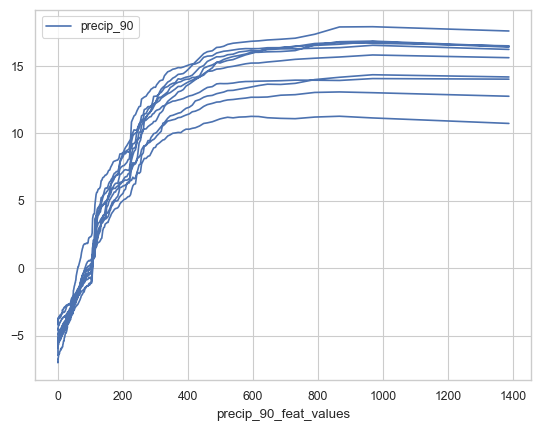

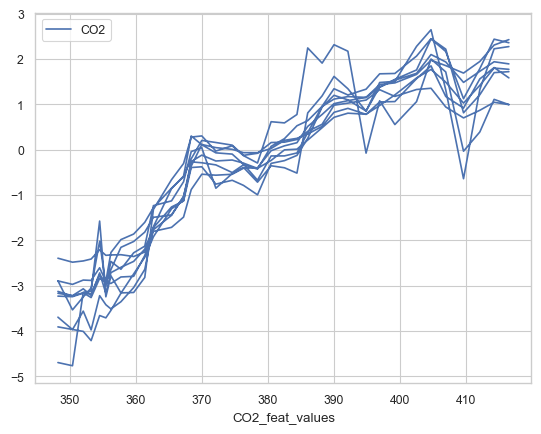

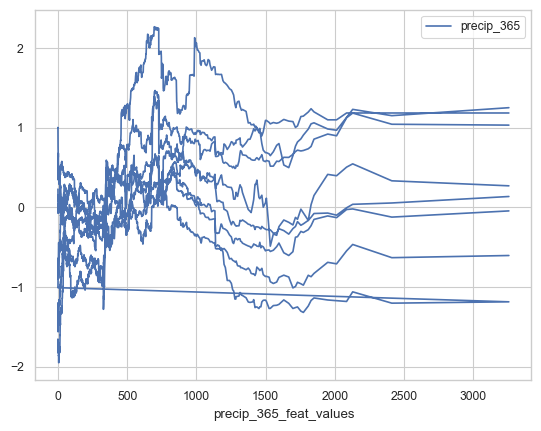

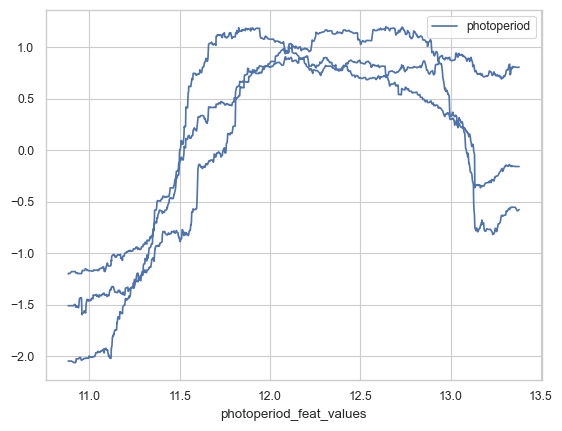

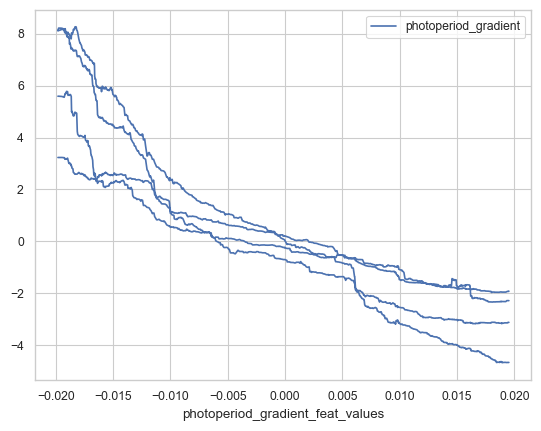

In [12]:
ALE_all_models_df.loc[ALE_all_models_df['Target'] == 'pv_filter'].plot(y = 'precip_90', x = 'precip_90_feat_values')
ALE_all_models_df.loc[ALE_all_models_df['Target'] == 'pv_filter'].plot(y = 'CO2', x = 'CO2_feat_values')
ALE_all_models_df.loc[ALE_all_models_df['Target'] == 'pv_filter'].plot(y = 'precip_365', x = 'precip_365_feat_values')
ALE_all_models_df.loc[ALE_all_models_df['Target'] == 'pv_filter'].plot(y = 'photoperiod', x = 'photoperiod_feat_values')
ALE_all_models_df.loc[ALE_all_models_df['Target'] == 'pv_filter'].plot(y = 'photoperiod_gradient', x = 'photoperiod_gradient_feat_values')

In [79]:
## Removing outliers 
# 1. Calculate Summary Stats 
# 2. Use the 1.5 of the IQR to find outliers 
# 3. Remove outliers 
# 4. Plot the ALE plots 

PV_ALE = ALE_all_models_df.loc[ALE_all_models_df['Target'] == 'pv_filter']
lower_q, upper_q = PV_ALE['precip_90_feat_values'].quantile([0.25, 0.75]) # get lower and upper quartiles 
iqr = upper_q - lower_q
lower_b, upper_b = np.maximum(0.0, lower_q - 1.5*iqr) , upper_q + 1.5*iqr # generate lower and upper bounds, however, limit the lower bounds to '0'

PV_ALE_removed_outlier = PV_ALE.loc[(PV_ALE['precip_90_feat_values'] >= lower_b) & (PV_ALE['precip_90_feat_values']  <= upper_b)]
PV_ALE_removed_outlier = PV_ALE_removed_outlier.sort_values(by = 'precip_90_feat_values')

<Axes: xlabel='precip_90_feat_values', ylabel='precip_90'>

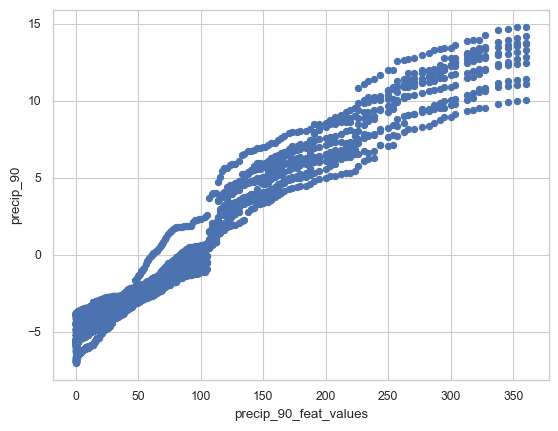

In [62]:
PV_ALE_removed_outlier.plot(x = 'precip_90_feat_values', y = 'precip_90', kind = 'scatter')

In [32]:
from pygam import LinearGAM, s

In [91]:
gam = LinearGAM(s(0)).fit(PV_ALE_removed_outlier['precip_90_feat_values'], 
                          PV_ALE_removed_outlier['precip_90'])


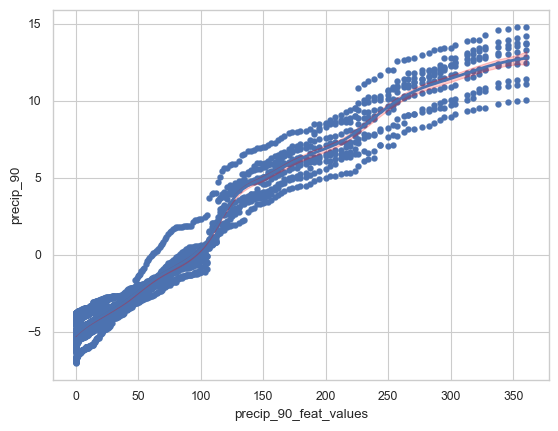

In [101]:
fig, axes = plt.subplots(1)


PV_ALE_removed_outlier.plot(x = 'precip_90_feat_values', y = 'precip_90', kind = 'scatter', ax = axes, linewidth = 0.1)

axes.plot(PV_ALE_removed_outlier['precip_90_feat_values'], gam.predict(PV_ALE_removed_outlier['precip_90_feat_values']), linewidth = 2)
confidence_intervals = gam.confidence_intervals(PV_ALE_removed_outlier['precip_90_feat_values'])
axes.fill_between(PV_ALE_removed_outlier['precip_90_feat_values'], confidence_intervals[:, 0],
                 confidence_intervals[:, 1], color='red', alpha=0.2, label='95% CI')



## Now testing for the three fractions

In [ ]:
## My implementation should include functions 

In [58]:
# Remove outlier via 1.5 * IQR method 

def remove_outliers_from_df(df, variable):
    lower_q, upper_q = df[variable].quantile([0.25, 0.75]) # get lower and upper quartiles 
    iqr = upper_q - lower_q
    lower_b, upper_b = np.maximum(0.0, lower_q - 1.5*iqr) , upper_q + 1.5*iqr # generate lower and upper bounds, however, limit the lower bounds to '0'
    
    return df.loc[(df[variable] >= lower_b) & (df[variable]  <= upper_b)]
    
def perform_gam(df, x, y):
    
    #print(df[x])
    #print(df[y])
    gam = LinearGAM().fit(df[x], df[y])
    gam_pred = gam.predict(df[x])
    conf_95 =  gam.confidence_intervals(df[x])
    
    return [gam_pred, conf_95]

In [59]:
veg_group_agg_importances_df = pd.read_csv(f'{results_dir}/Results_Visualisation/Aggregated_Importances.csv').set_index('Unnamed: 0')

In [60]:
veg_group_agg_importances_df

0                           group
Unnamed: 0                                                 
twi_1s        -7.306650e+00                 Desert Chenopod
tmin_lag      -8.304576e-02                 Desert Chenopod
fire_severity -7.105427e-16                 Desert Chenopod
tmax_7         0.000000e+00                 Desert Chenopod
tmax_lag       0.000000e+00                 Desert Chenopod
...                     ...                             ...
precip_30      1.120708e+01  Tropical/Savanna Tussock.grass
precip_365     1.465313e+01  Tropical/Savanna Tussock.grass
CO2            1.682621e+01  Tropical/Savanna Tussock.grass
precip_90      6.374759e+01  Tropical/Savanna Tussock.grass
MAP            8.995543e+01  Tropical/Savanna Tussock.grass

[352 rows x 2 columns]

In [70]:
SEASONAL_FEATURES = ['photoperiod', 'photoperiod_gradient']

PRECIP_FEATURES = ['precip_30', 'precip_90', 'precip_180', 
                   'precip_365', 'precip_730', 'precip_1095', 
                   'precip_1460']

MEAN_ANNUAL_CLIMATE_FEATURES = ['MAT', 'MAP']

TEMP_FEATURES = ['tmax_lag', 'tmax_7', 'tmax_14', 
                 'tmax_30', 'tmin_lag', 'tmin_7', 
                 'tmin_14', 'tmin_30']

VPD_FEATURES = ['VPD_lag','VPD_7', 'VPD_14',
                'VPD_30']

FIRE_FEATURES = ['days_since_fire', 'fire_severity']

CO2_FEATURES = ['CO2']

SOIL_FEATURES = ['SLGA_1','SLGA_2','SLGA_3', 'DER_000_999'] # the soil attributes to include

TOPOGRAPHIC_FEATURES = ['aspect_1s', 'twi_1s']

FEATURES =  SEASONAL_FEATURES + PRECIP_FEATURES + VPD_FEATURES + FIRE_FEATURES + CO2_FEATURES + TEMP_FEATURES + SOIL_FEATURES + TOPOGRAPHIC_FEATURES

TEMPORAL_FEATURES = SEASONAL_FEATURES + PRECIP_FEATURES + VPD_FEATURES + CO2_FEATURES + TEMP_FEATURES
SPATIAL_FEATURES = SOIL_FEATURES + TOPOGRAPHIC_FEATURES + MEAN_ANNUAL_CLIMATE_FEATURES

TARGET = ['pv_filter', 'npv_filter', 'bs_filter']

In [71]:
# Now extract the most important variables from the variable importances 

veg_group_agg_spatial = veg_group_agg_importances_df.iloc[veg_group_agg_importances_df.index.isin(TEMPORAL_FEATURES)] # note I removed the fire variables 
top_5_variables = {}

groups = np.unique(veg_group_agg_spatial['group'])
for g in groups:
    veg_group_agg_group = veg_group_agg_spatial[veg_group_agg_spatial['group'] == g].sort_values('0', ascending = False)
    veg_group_agg_group = veg_group_agg_group.iloc[:5]
    top_5_variables[veg_group_agg_group['group'].values[0]] = list(veg_group_agg_group.index)
print(top_5_variables)

{'Desert Chenopod': ['CO2', 'precip_90', 'precip_365', 'VPD_30', 'precip_180'], 'Desert Forb': ['precip_90', 'VPD_30', 'CO2', 'tmax_14', 'tmin_7'], 'Desert Hummock.grass': ['CO2', 'precip_90', 'precip_365', 'precip_180', 'precip_730'], 'Desert Shrub': ['precip_90', 'CO2', 'photoperiod_gradient', 'photoperiod', 'precip_30'], 'Desert Tree.Palm': ['CO2', 'precip_90', 'photoperiod', 'precip_365', 'VPD_30'], 'Desert Tussock.grass': ['CO2', 'precip_90', 'photoperiod_gradient', 'precip_365', 'precip_30'], 'Temp/Med Shrub': ['photoperiod', 'CO2', 'precip_365', 'tmax_14', 'VPD_30'], 'Temp/Med Tree.Palm': ['photoperiod', 'precip_180', 'precip_365', 'photoperiod_gradient', 'tmax_lag'], 'Temp/Med Tussock.grass': ['CO2', 'tmax_30', 'VPD_30', 'precip_90', 'tmin_30'], 'Tropical/Savanna Tree.Palm': ['precip_90', 'CO2', 'precip_30', 'photoperiod_gradient', 'precip_180'], 'Tropical/Savanna Tussock.grass': ['precip_90', 'CO2', 'precip_365', 'precip_30', 'precip_180']}


In [72]:
## Now adjusting the ordering to which we plot the 5 most important variables 

desert_variables = []
non_desert_variables = []
for i, v in top_5_variables.items():
    if i.split(' ')[0] == 'Desert':
        for var in v:
            desert_variables.append(var)
    else:
        for var in v:
            non_desert_variables.append(var)

In [73]:
ordering_desert = pd.Series(desert_variables).value_counts().index.values # base the order on the most frequent variable in the tally

In [74]:
ordering_desert

array(['CO2', 'precip_90', 'precip_365', 'VPD_30', 'precip_180',
       'photoperiod_gradient', 'photoperiod', 'precip_30', 'tmax_14',
       'tmin_7', 'precip_730'], dtype=object)

In [75]:
ordering_non_desert = pd.Series(non_desert_variables).value_counts().index.values
ordering_non_desert

array(['CO2', 'precip_365', 'precip_180', 'precip_90', 'photoperiod',
       'VPD_30', 'photoperiod_gradient', 'precip_30', 'tmax_14',
       'tmax_lag', 'tmax_30', 'tmin_30'], dtype=object)

## Temporal Desert

0
CO2_feat_values
0
precip_90_feat_values
0
skip VPD_30
VPD_30_feat_values
0
skip precip_180
skip photoperiod_gradient
skip photoperiod
skip precip_30
skip tmax_14
tmax_14_feat_values
0
skip photoperiod_gradient
skip photoperiod
skip precip_30
skip tmax_14
skip tmin_7
tmin_7_feat_values
1
CO2_feat_values
1
precip_90_feat_values
1
precip_365_feat_values
1
VPD_30_feat_values
1
precip_180_feat_values
2
CO2_feat_values
2
precip_90_feat_values
2
precip_365_feat_values
2
skip precip_180
precip_180_feat_values
2
skip photoperiod_gradient
skip photoperiod
skip precip_30
skip tmax_14
skip tmin_7
skip precip_730
precip_730_feat_values
3
CO2_feat_values
3
precip_90_feat_values
3
precip_365_feat_values
3
VPD_30_feat_values
3
skip photoperiod_gradient
skip photoperiod
photoperiod_feat_values
4
CO2_feat_values
4
precip_90_feat_values
4
skip VPD_30
skip precip_180
skip photoperiod_gradient
photoperiod_gradient_feat_values
4
skip precip_180
skip photoperiod_gradient
skip photoperiod
photoperiod_feat_v

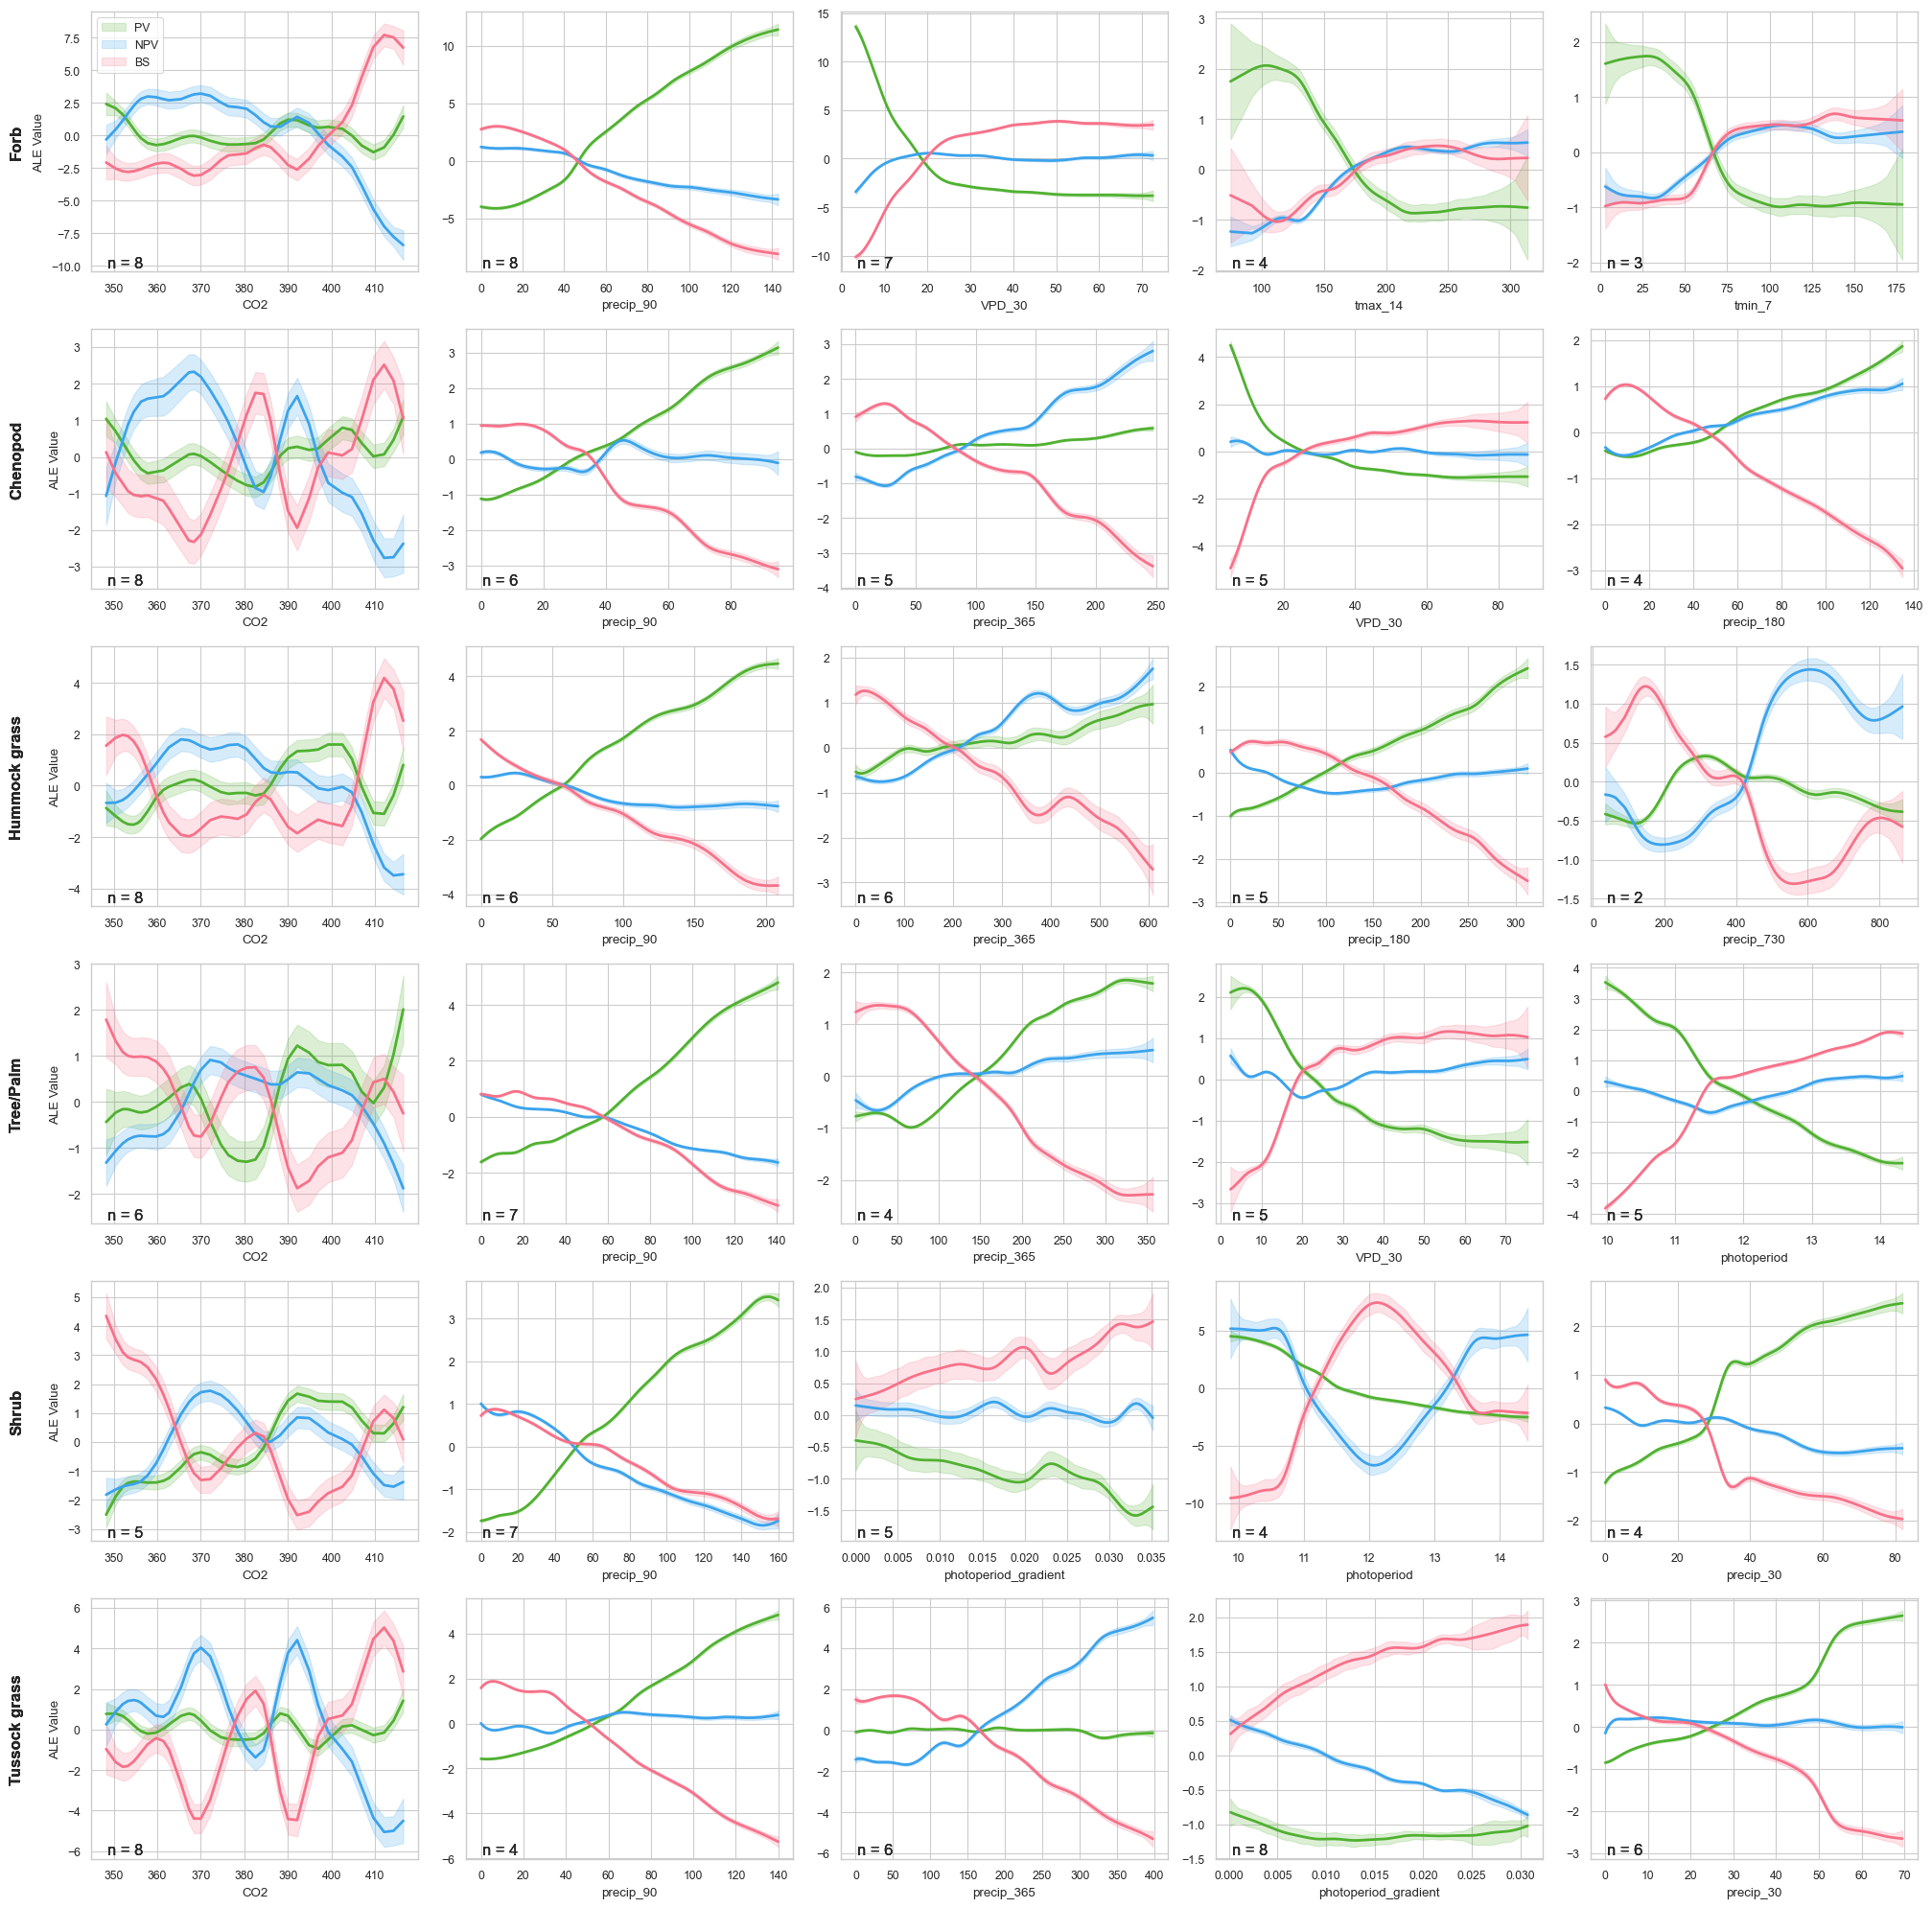

In [69]:
ncols = 5
nrows = 6
fig, axes = plt.subplots(ncols = ncols, nrows = nrows, figsize = (20, 20))

ordered_veg_list = ['Desert Forb',                 'Desert Chenopod', 'Desert Hummock.grass',
                    'Desert Tree.Palm',            'Desert Shrub',    'Desert Tussock.grass']

# ordered_veg_list = ['Desert Forb',                 'Desert Chenopod', 'Desert Hummock.grass',
#                    'Desert Tree.Palm',            'Desert Shrub',    'Desert Tussock.grass',
#                    'Temp/Med Tree.Palm',          'Temp/Med Shrub',  'Temp/Med Tussock.grass',
#                    'Tropical/Savanna Tree.Palm',  'Tropical/Savanna Tussock.grass']

color_palette = [list(sns.color_palette("husl", 3))[1], list(sns.color_palette("husl", 3))[2], list(sns.color_palette("husl", 3))[0]]

# Iterate by plot grid ~ ncols corresponds to the number of variables to plot
#                      ~ nrows corresponds to the number of veg group to plot 

taken_variable = []
veg_group_idx = 0
for i, ax in enumerate(axes.flat):
    
    
    # Set the veg group index
    #print(i % ncols)
   
    if i % ncols == 0 and i != 0:
        veg_group_idx += 1
        taken_variable = []
    print(veg_group_idx)
    
    # Read in the data and set the variable group 
    veg_group = ordered_veg_list[veg_group_idx]
    super_group_folder_name = '_'.join(veg_group.split('/')) 
    ALE_all_models_df = pd.read_csv(f'{results_dir}/Results_Visualisation/ALE_values_{super_group_folder_name}.csv')
    
    # Set the variable index
    
    possessed_variables = top_5_variables[veg_group]
    variable_col = i % ncols
    variable_priority = ordering_desert[variable_col]
    
    while variable_priority not in possessed_variables or variable_priority in taken_variable:
        variable_col += 1
        variable_priority = ordering_desert[variable_col]
        print(f'skip {variable_priority}')
        
    taken_variable.append(variable_priority)
    
    
    x_variable = variable_priority + '_feat_values'
    y_variable = variable_priority
    print(x_variable)

    # Iterate by fractional cover type 
    for color_idx, fraction in enumerate(TARGET):

        # Remove outliers in the x_variable 
        #print(ALE_all_models_df)
        fraction_ALE = ALE_all_models_df.loc[ALE_all_models_df['Target'] == fraction][[x_variable, y_variable, 'Model']].dropna()
        fraction_ALE_removed_outlier = remove_outliers_from_df(fraction_ALE, x_variable).sort_values(x_variable)

        # Perform gam
        gam_pred, conf_95 = perform_gam(fraction_ALE_removed_outlier, x_variable, y_variable)

        # Plotting the gam

        ax.plot(fraction_ALE_removed_outlier[x_variable], gam_pred, linewidth = 2, color = color_palette[color_idx])
        ax.fill_between(fraction_ALE_removed_outlier[x_variable], conf_95[:, 0],
                         conf_95[:, 1], alpha=0.2, label='95% CI', color = color_palette[color_idx])

        ax.set_xlabel(y_variable)
        
        veg_name = ' '.join(super_group_folder_name.split(" ")[1].split('.'))
        if veg_name == 'Tree Palm':
            veg_name = 'Tree/Palm'
        
        if i % ncols == 0:
            ax.set_ylabel('ALE Value')
            ax.text(-0.25, 0.5, veg_name,
                    transform=ax.transAxes, fontsize=12,
                    fontweight='bold', rotation=90,
                    va = 'center')

        if i == 0:
            handles = ax.get_legend_handles_labels()[0]
            new_labels = ['PV', 'NPV', 'BS']
            ax.legend(handles, new_labels)
            
        # Annotation
        number_of_models = len(np.unique(fraction_ALE_removed_outlier['Model']))
        ax.text(0.05, 0.06, f'n = {number_of_models}', transform=ax.transAxes, 
            fontsize=12, va='top')
        

plt.tight_layout()
fig.savefig(f'{plots_dir}/Total_Deserts_ALE_Dependence_Plots.png')

## Temporal Non Desert

0
Temp_Med Tree.Palm
skip precip_365
precip_365_feat_values
0
Temp_Med Tree.Palm
skip precip_180
precip_180_feat_values
0
Temp_Med Tree.Palm
skip precip_90
skip photoperiod
photoperiod_feat_values
0
Temp_Med Tree.Palm
skip photoperiod
skip VPD_30
skip photoperiod_gradient
photoperiod_gradient_feat_values
0
Temp_Med Tree.Palm
skip VPD_30
skip photoperiod_gradient
skip precip_30
skip tmax_14
skip tmax_lag
tmax_lag_feat_values
1
Temp_Med Shrub
CO2_feat_values
1
Temp_Med Shrub
precip_365_feat_values
1
Temp_Med Shrub
skip precip_90
skip photoperiod
photoperiod_feat_values
1
Temp_Med Shrub
skip photoperiod
skip VPD_30
VPD_30_feat_values
1
Temp_Med Shrub
skip VPD_30
skip photoperiod_gradient
skip precip_30
skip tmax_14
tmax_14_feat_values
2
Temp_Med Tussock.grass
CO2_feat_values
2
Temp_Med Tussock.grass
skip precip_180
skip precip_90
precip_90_feat_values
2
Temp_Med Tussock.grass
skip precip_90
skip photoperiod
skip VPD_30
VPD_30_feat_values
2
Temp_Med Tussock.grass
skip photoperiod
skip VPD_

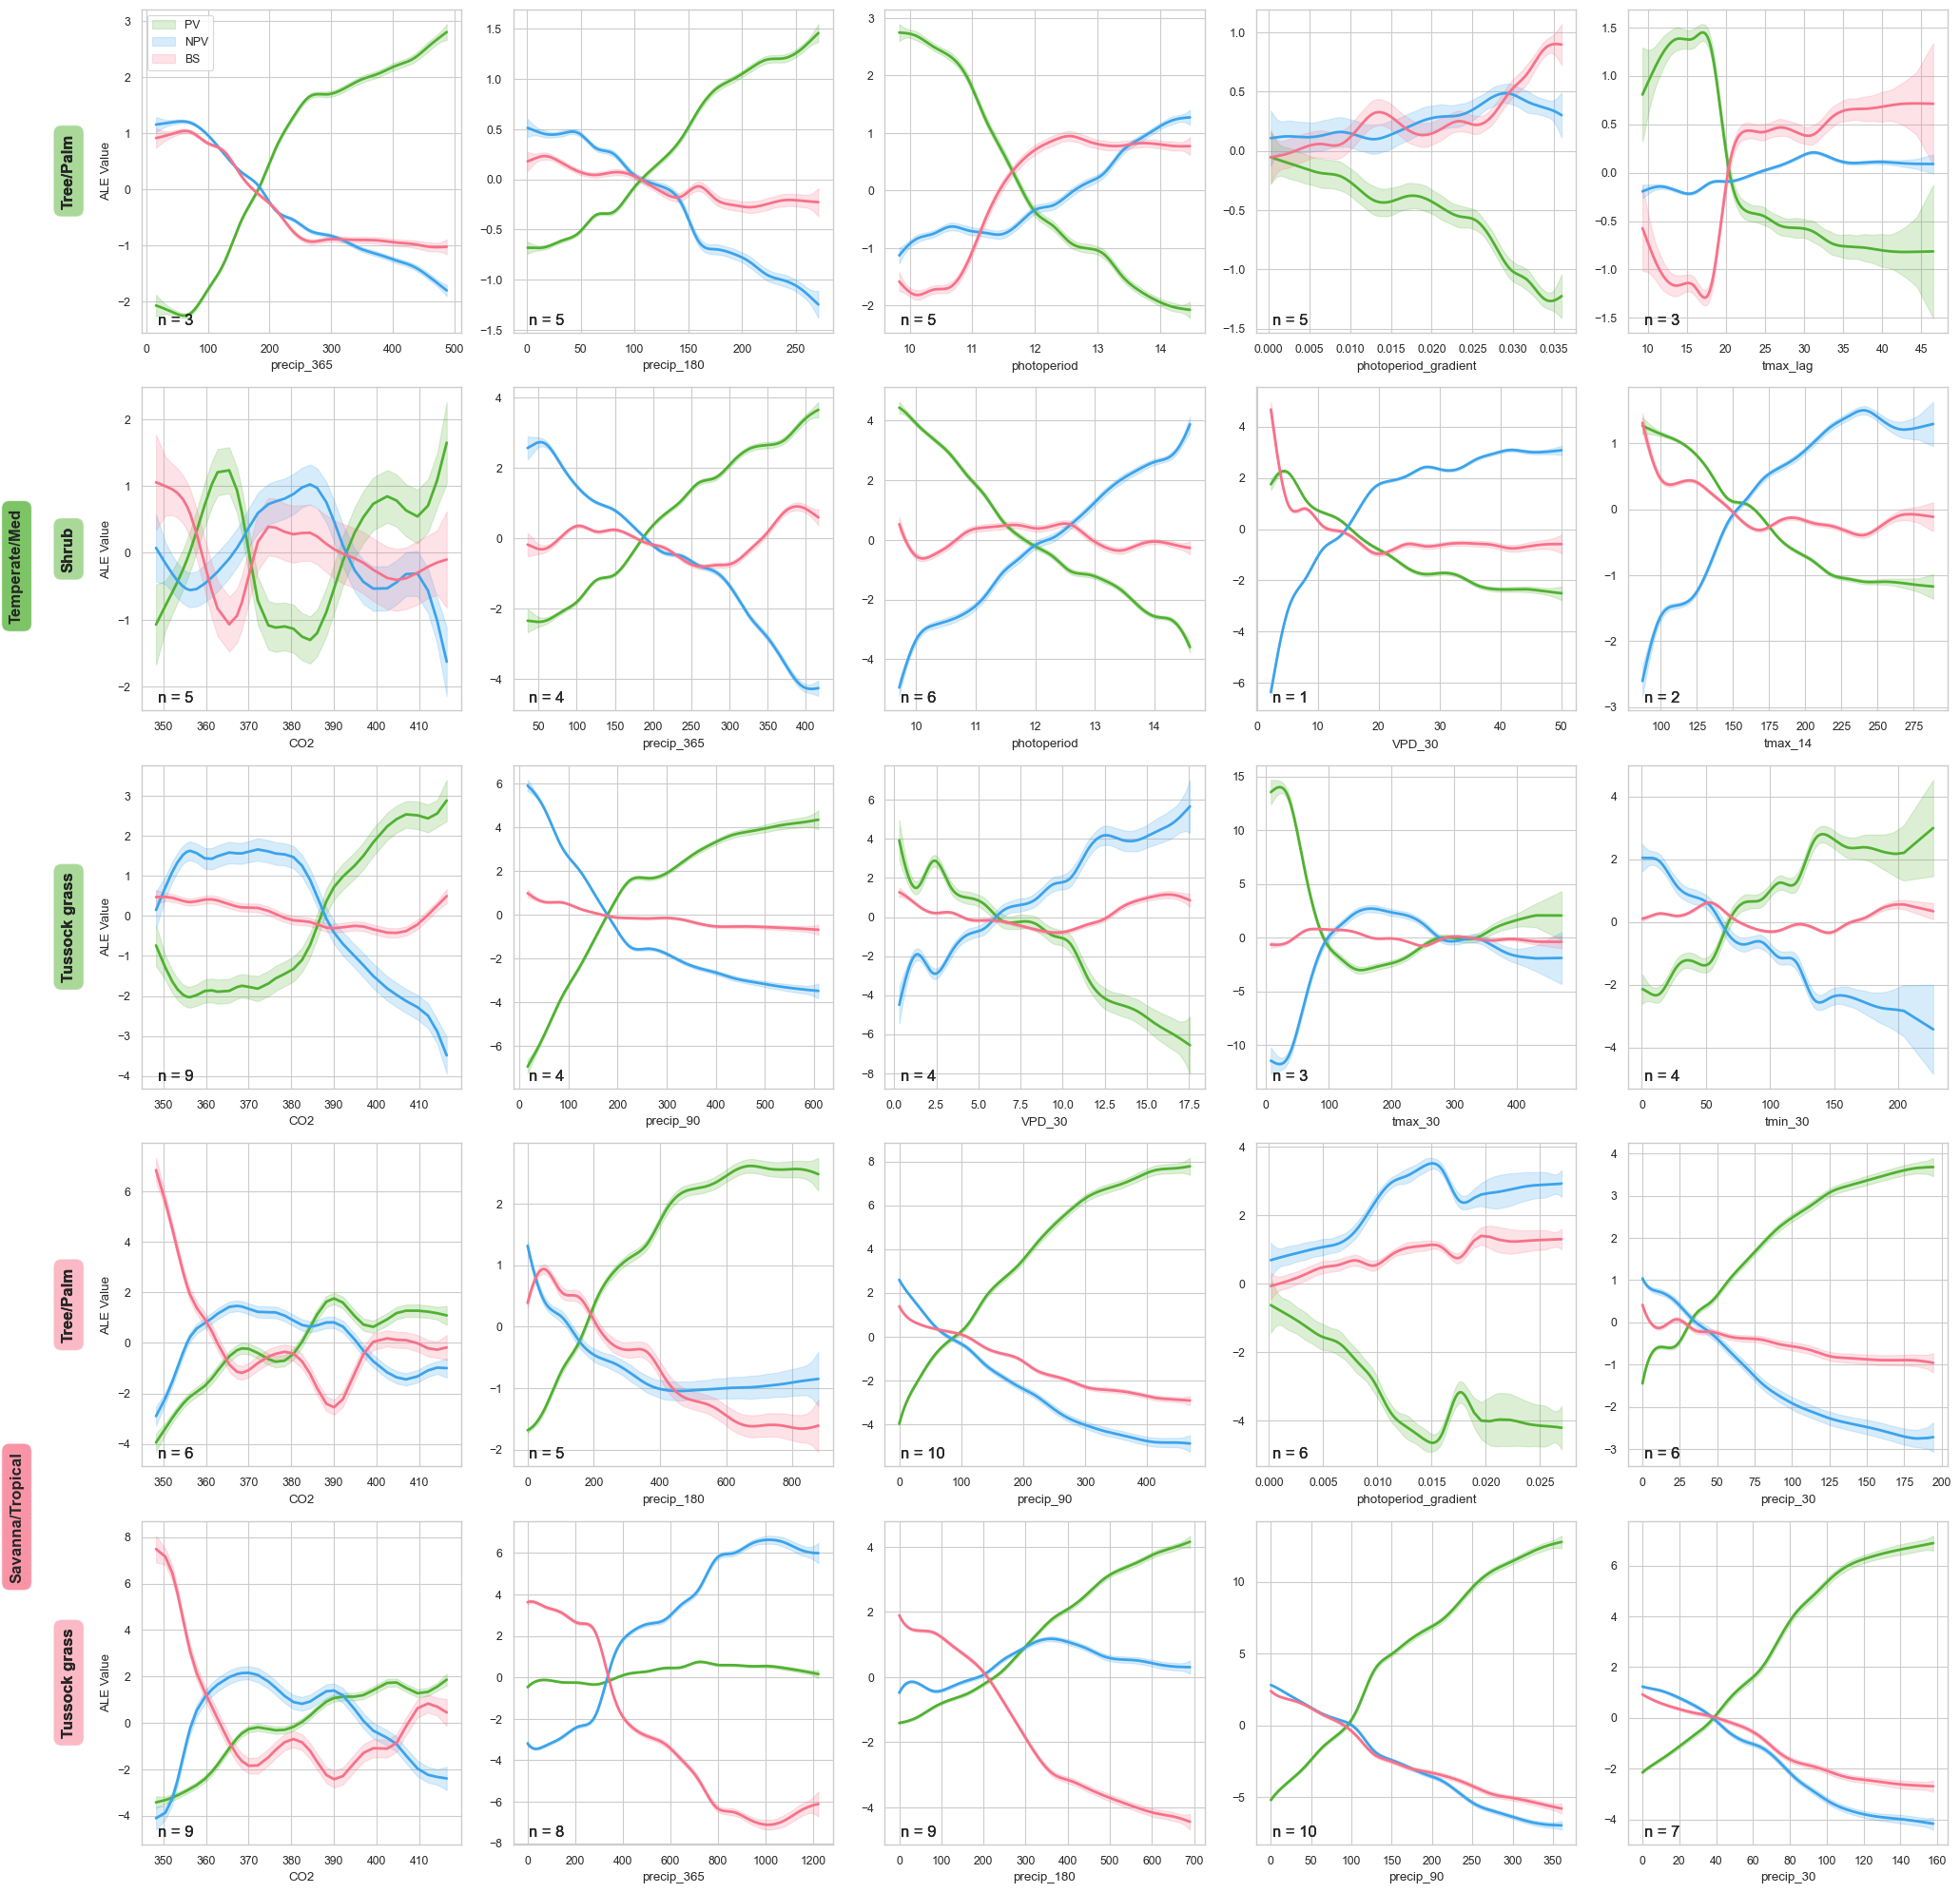

In [124]:
ncols = 5
nrows = 5
fig, axes = plt.subplots(ncols = ncols, nrows = nrows, figsize = (20, 20))

ordered_veg_list = ['Temp/Med Tree.Palm',          'Temp/Med Shrub',  
                    'Temp/Med Tussock.grass',      'Tropical/Savanna Tree.Palm', 
                    'Tropical/Savanna Tussock.grass']

color_palette = [list(sns.color_palette("husl", 3))[1], list(sns.color_palette("husl", 3))[2], list(sns.color_palette("husl", 3))[0]]

# Iterate by plot grid ~ ncols corresponds to the number of variables to plot
#                      ~ nrows corresponds to the number of veg group to plot 

# Add box for temp/Med
fig.text(-0.025, 0.70, 'Temperate/Med', fontsize=12, va='center', ha='center',
         bbox=dict(facecolor= color_palette[0], alpha=0.75, boxstyle="round,pad=0.5"), rotation=90, fontweight='bold')
#rect = Rectangle((-0.060, 0.4), 0.075, 0.60, transform=fig.transFigure,
#                 color= color_palette[0], alpha=0.5)
#fig.patches.append(rect)

# Add box for savanna/tropical
fig.text(-0.025, 0.20, 'Savanna/Tropical', fontsize=12, va='center', ha='center',
         bbox=dict(facecolor= color_palette[2], alpha=0.75, boxstyle="round,pad=0.5"), rotation=90, fontweight='bold')
#rect = Rectangle((-0.060, 0.0), 0.075, 0.40, transform=fig.transFigure,
#                 color= color_palette[2], alpha=0.5)
#fig.patches.append(rect)


taken_variable = []
veg_group_idx = 0
for i, ax in enumerate(axes.flat):
    
    
    # Set the veg group index
    #print(i % ncols)
   
    if i % ncols == 0 and i != 0:
        veg_group_idx += 1
        taken_variable = []
    
    
    # Read in the data and set the variable group 
    veg_group = ordered_veg_list[veg_group_idx]
    super_group_folder_name = '_'.join(veg_group.split('/')) 
    ALE_all_models_df = pd.read_csv(f'{results_dir}/Results_Visualisation/ALE_values_{super_group_folder_name}.csv')
    
    print(veg_group_idx)
    print(super_group_folder_name)
    # Set the variable index
    possessed_variables = top_5_variables[veg_group]
    variable_col = i % ncols
    variable_priority = ordering_non_desert[variable_col]
    
    while variable_priority not in possessed_variables or variable_priority in taken_variable:
        variable_col += 1
        variable_priority = ordering_non_desert[variable_col]
        print(f'skip {variable_priority}')
        
    taken_variable.append(variable_priority)
    
    
    x_variable = variable_priority + '_feat_values'
    y_variable = variable_priority
    print(x_variable)

    # Iterate by fractional cover type 
    for color_idx, fraction in enumerate(TARGET):

        # Remove outliers in the x_variable 
        #print(ALE_all_models_df)
        fraction_ALE = ALE_all_models_df.loc[ALE_all_models_df['Target'] == fraction][[x_variable, y_variable, 'Model']].dropna()
        fraction_ALE_removed_outlier = remove_outliers_from_df(fraction_ALE, x_variable).sort_values(x_variable)

        # Perform gam
        gam_pred, conf_95 = perform_gam(fraction_ALE_removed_outlier, x_variable, y_variable)

        # Plotting the gam

        ax.plot(fraction_ALE_removed_outlier[x_variable], gam_pred, linewidth = 2, color = color_palette[color_idx])
        ax.fill_between(fraction_ALE_removed_outlier[x_variable], conf_95[:, 0],
                         conf_95[:, 1], alpha=0.2, label='95% CI', color = color_palette[color_idx])

        ax.set_xlabel(y_variable)
        
        veg_name = ' '.join(super_group_folder_name.split(" ")[1].split('.'))
        if veg_name == 'Tree Palm':
            veg_name = 'Tree/Palm'
        
        if i % ncols == 0:
            ax.set_ylabel('ALE Value')       
            
            # Annotation
            if veg_group.split(' ')[0] == 'Temp/Med':
                col_pal = color_palette[0]
            else:
                col_pal = color_palette[2]
                
            ax.text(-0.25, 0.5, veg_name,
                    transform=ax.transAxes, fontsize=12,
                    fontweight='bold', rotation=90,
                    va = 'center', bbox=dict(facecolor= col_pal, alpha=0.2,boxstyle="round,pad=0.5"))

        if i == 0:
            handles = ax.get_legend_handles_labels()[0]
            new_labels = ['PV', 'NPV', 'BS']
            ax.legend(handles, new_labels)
            

        
        number_of_models = len(np.unique(fraction_ALE_removed_outlier['Model']))
        ax.text(0.05, 0.06, f'n = {number_of_models}', transform=ax.transAxes, 
            fontsize=12, va='top')
        


# Plot and save plot
plt.tight_layout()
fig.savefig(f'{plots_dir}/Total_NonDeserts_ALE_Dependence_Plots.png')

## Now looking at spatial

In [32]:
# Remove outlier via 1.5 * IQR method 

def remove_outliers_from_df(df, variable):
    lower_q, upper_q = df[variable].quantile([0.25, 0.75]) # get lower and upper quartiles 
    iqr = upper_q - lower_q
    lower_b, upper_b = np.maximum(0.0, lower_q - 1.5*iqr) , upper_q + 1.5*iqr # generate lower and upper bounds, however, limit the lower bounds to '0'
    
    return df.loc[(df[variable] >= lower_b) & (df[variable]  <= upper_b)]
    
def perform_gam(df, x, y):
    
    #print(df[x])
    #print(df[y])
    gam = LinearGAM().fit(df[x], df[y])
    gam_pred = gam.predict(df[x])
    conf_95 =  gam.confidence_intervals(df[x])
    
    return [gam_pred, conf_95]

In [33]:
veg_group_agg_importances_df = pd.read_csv(f'{results_dir}/Results_Visualisation/Aggregated_Importances.csv').set_index('Unnamed: 0')

In [34]:
veg_group_agg_importances_df

0                           group
Unnamed: 0                                                 
twi_1s        -7.306650e+00                 Desert Chenopod
tmin_lag      -8.304576e-02                 Desert Chenopod
fire_severity -7.105427e-16                 Desert Chenopod
tmax_7         0.000000e+00                 Desert Chenopod
tmax_lag       0.000000e+00                 Desert Chenopod
...                     ...                             ...
precip_30      1.120708e+01  Tropical/Savanna Tussock.grass
precip_365     1.465313e+01  Tropical/Savanna Tussock.grass
CO2            1.682621e+01  Tropical/Savanna Tussock.grass
precip_90      6.374759e+01  Tropical/Savanna Tussock.grass
MAP            8.995543e+01  Tropical/Savanna Tussock.grass

[352 rows x 2 columns]

In [35]:
SEASONAL_FEATURES = ['photoperiod', 'photoperiod_gradient']

PRECIP_FEATURES = ['precip_30', 'precip_90', 'precip_180', 
                   'precip_365', 'precip_730', 'precip_1095', 
                   'precip_1460']

MEAN_ANNUAL_CLIMATE_FEATURES = ['MAT', 'MAP']

TEMP_FEATURES = ['tmax_lag', 'tmax_7', 'tmax_14', 
                 'tmax_30', 'tmin_lag', 'tmin_7', 
                 'tmin_14', 'tmin_30']

VPD_FEATURES = ['VPD_lag','VPD_7', 'VPD_14',
                'VPD_30']

FIRE_FEATURES = ['days_since_fire', 'fire_severity']

CO2_FEATURES = ['CO2']

SOIL_FEATURES = ['SLGA_1','SLGA_2','SLGA_3', 'DER_000_999'] # the soil attributes to include

TOPOGRAPHIC_FEATURES = ['aspect_1s', 'twi_1s']

FEATURES =  SEASONAL_FEATURES + PRECIP_FEATURES + VPD_FEATURES + FIRE_FEATURES + CO2_FEATURES + TEMP_FEATURES + SOIL_FEATURES + TOPOGRAPHIC_FEATURES

TEMPORAL_FEATURES = SEASONAL_FEATURES + PRECIP_FEATURES + VPD_FEATURES + CO2_FEATURES + TEMP_FEATURES
SPATIAL_FEATURES = SOIL_FEATURES + TOPOGRAPHIC_FEATURES + MEAN_ANNUAL_CLIMATE_FEATURES

TARGET = ['pv_filter', 'npv_filter', 'bs_filter']

In [36]:
# Now extract the most important variables from the variable importances 

veg_group_agg_spatial = veg_group_agg_importances_df.iloc[veg_group_agg_importances_df.index.isin(SPATIAL_FEATURES)] # note I removed the fire variables 
top_5_variables = {}

groups = np.unique(veg_group_agg_spatial['group'])
for g in groups:
    veg_group_agg_group = veg_group_agg_spatial[veg_group_agg_spatial['group'] == g].sort_values('0', ascending = False)
    veg_group_agg_group = veg_group_agg_group.iloc[:5]
    top_5_variables[veg_group_agg_group['group'].values[0]] = list(veg_group_agg_group.index)
print(top_5_variables)

{'Desert Chenopod': ['SLGA_3', 'MAT', 'aspect_1s', 'SLGA_2', 'DER_000_999'], 'Desert Forb': ['MAT', 'SLGA_3', 'aspect_1s', 'twi_1s', 'SLGA_2'], 'Desert Hummock.grass': ['MAP', 'MAT', 'SLGA_3', 'SLGA_1', 'aspect_1s'], 'Desert Shrub': ['MAP', 'SLGA_3', 'DER_000_999', 'aspect_1s', 'twi_1s'], 'Desert Tree.Palm': ['MAT', 'MAP', 'aspect_1s', 'SLGA_2', 'twi_1s'], 'Desert Tussock.grass': ['MAT', 'MAP', 'twi_1s', 'SLGA_1', 'SLGA_3'], 'Temp/Med Shrub': ['MAP', 'SLGA_2', 'SLGA_1', 'SLGA_3', 'aspect_1s'], 'Temp/Med Tree.Palm': ['MAP', 'MAT', 'SLGA_1', 'twi_1s', 'SLGA_3'], 'Temp/Med Tussock.grass': ['MAP', 'SLGA_2', 'MAT', 'SLGA_3', 'DER_000_999'], 'Tropical/Savanna Tree.Palm': ['MAP', 'SLGA_3', 'SLGA_2', 'twi_1s', 'MAT'], 'Tropical/Savanna Tussock.grass': ['MAP', 'SLGA_1', 'SLGA_2', 'MAT', 'aspect_1s']}


In [37]:
## Now adjusting the ordering to which we plot the 5 most important variables 

desert_variables = []
non_desert_variables = []
for i, v in top_5_variables.items():
    if i.split(' ')[0] == 'Desert':
        for var in v:
            desert_variables.append(var)
    else:
        for var in v:
            non_desert_variables.append(var)

In [38]:
ordering_desert = pd.Series(desert_variables).value_counts().index.values # base the order on the most frequent variable in the tally

In [39]:
ordering_desert

array(['SLGA_3', 'MAT', 'aspect_1s', 'twi_1s', 'MAP', 'SLGA_2',
       'DER_000_999', 'SLGA_1'], dtype=object)

In [40]:
ordering_non_desert = pd.Series(non_desert_variables).value_counts().index.values
ordering_non_desert

array(['MAP', 'SLGA_2', 'SLGA_3', 'MAT', 'SLGA_1', 'aspect_1s', 'twi_1s',
       'DER_000_999'], dtype=object)

## Spatial Desert

0
SLGA_3_feat_values
0
MAT_feat_values
0
aspect_1s_feat_values
0
twi_1s_feat_values
0
skip SLGA_2
SLGA_2_feat_values
1
SLGA_3_feat_values
1
MAT_feat_values
1
aspect_1s_feat_values
1
skip MAP
skip SLGA_2
SLGA_2_feat_values
1
skip SLGA_2
skip DER_000_999
DER_000_999_feat_values
2
SLGA_3_feat_values
2
MAT_feat_values
2
aspect_1s_feat_values
2
skip MAP
MAP_feat_values
2
skip SLGA_2
skip DER_000_999
skip SLGA_1
SLGA_1_feat_values
3
skip MAT
MAT_feat_values
3
skip aspect_1s
aspect_1s_feat_values
3
skip twi_1s
twi_1s_feat_values
3
skip MAP
MAP_feat_values
3
skip SLGA_2
SLGA_2_feat_values
4
SLGA_3_feat_values
4
skip aspect_1s
aspect_1s_feat_values
4
skip twi_1s
twi_1s_feat_values
4
skip MAP
MAP_feat_values
4
skip SLGA_2
skip DER_000_999
DER_000_999_feat_values
5
SLGA_3_feat_values
5
MAT_feat_values
5
skip twi_1s
twi_1s_feat_values
5
skip MAP
MAP_feat_values
5
skip SLGA_2
skip DER_000_999
skip SLGA_1
SLGA_1_feat_values


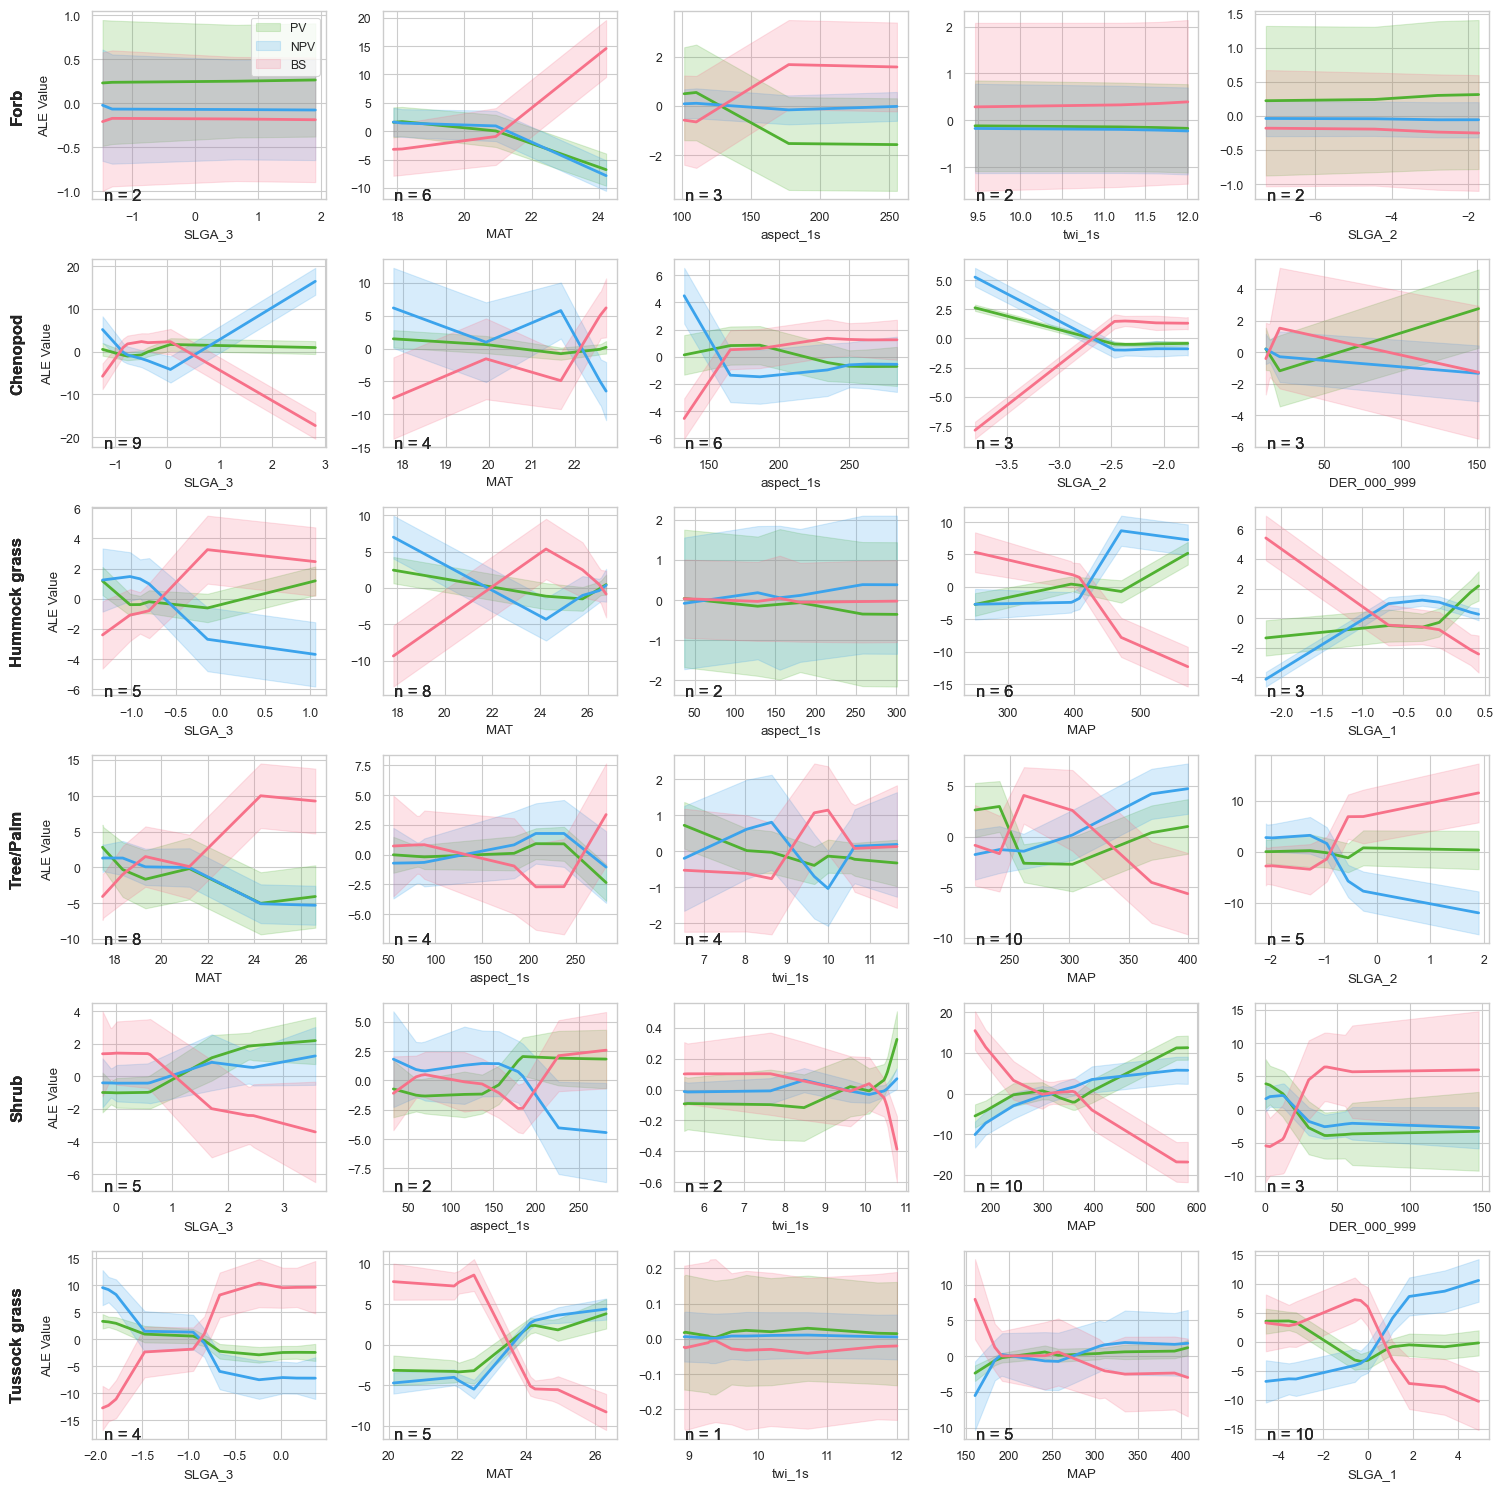

In [56]:


ncols = 5
nrows = 6
fig, axes = plt.subplots(ncols = ncols, nrows = nrows, figsize = (15, 15))

ordered_veg_list = ['Desert Forb',                 'Desert Chenopod', 'Desert Hummock.grass',
                    'Desert Tree.Palm',            'Desert Shrub',    'Desert Tussock.grass']

# ordered_veg_list = ['Desert Forb',                 'Desert Chenopod', 'Desert Hummock.grass',
#                    'Desert Tree.Palm',            'Desert Shrub',    'Desert Tussock.grass',
#                    'Temp/Med Tree.Palm',          'Temp/Med Shrub',  'Temp/Med Tussock.grass',
#                    'Tropical/Savanna Tree.Palm',  'Tropical/Savanna Tussock.grass']

color_palette = [list(sns.color_palette("husl", 3))[1], list(sns.color_palette("husl", 3))[2], list(sns.color_palette("husl", 3))[0]]

# Iterate by plot grid ~ ncols corresponds to the number of variables to plot
#                      ~ nrows corresponds to the number of veg group to plot 

taken_variable = []
veg_group_idx = 0
for i, ax in enumerate(axes.flat):
    
    
    # Set the veg group index
    #print(i % ncols)
   
    if i % ncols == 0 and i != 0:
        veg_group_idx += 1
        taken_variable = []
    print(veg_group_idx)
    
    # Read in the data and set the variable group 
    veg_group = ordered_veg_list[veg_group_idx]
    super_group_folder_name = '_'.join(veg_group.split('/')) 
    ALE_all_models_df = pd.read_csv(f'{results_dir}/Results_Visualisation/ALE_values_{super_group_folder_name}.csv')
    
    # Set the variable index
    
    possessed_variables = top_5_variables[veg_group]
    variable_col = i % ncols
    variable_priority = ordering_desert[variable_col]
    
    while variable_priority not in possessed_variables or variable_priority in taken_variable:
        variable_col += 1
        variable_priority = ordering_desert[variable_col]
        print(f'skip {variable_priority}')
        
    taken_variable.append(variable_priority)
    
    
    x_variable = variable_priority + '_feat_values'
    y_variable = variable_priority
    print(x_variable)

    # Iterate by fractional cover type 
    for color_idx, fraction in enumerate(TARGET):

        # Remove outliers in the x_variable 
        #print(ALE_all_models_df)
        fraction_ALE = ALE_all_models_df.loc[ALE_all_models_df['Target'] == fraction][[x_variable, y_variable, 'Model']].dropna()
        fraction_ALE_removed_outlier = fraction_ALE.sort_values(x_variable)

        # Perform gam
        gam_pred, conf_95 = perform_gam(fraction_ALE_removed_outlier, x_variable, y_variable)

        # Plotting the gam

        ax.plot(fraction_ALE_removed_outlier[x_variable], gam_pred, linewidth = 2, color = color_palette[color_idx])
        ax.fill_between(fraction_ALE_removed_outlier[x_variable], conf_95[:, 0],
                         conf_95[:, 1], alpha=0.2, label='95% CI', color = color_palette[color_idx])

        ax.set_xlabel(y_variable)
        
        veg_name = ' '.join(super_group_folder_name.split(" ")[1].split('.'))
        if veg_name == 'Tree Palm':
            veg_name = 'Tree/Palm'
        
        if i % ncols == 0:
            ax.set_ylabel('ALE Value')
            ax.text(-0.35, 0.5, veg_name,
                    transform=ax.transAxes, fontsize=12,
                    fontweight='bold', rotation=90,
                    va = 'center')

        if i == 0:
            handles = ax.get_legend_handles_labels()[0]
            new_labels = ['PV', 'NPV', 'BS']
            ax.legend(handles, new_labels)
            
        # Annotation
        number_of_models = len(np.unique(fraction_ALE_removed_outlier['Model']))
        ax.text(0.05, 0.06, f'n = {number_of_models}', transform=ax.transAxes, 
            fontsize=12, va='top')
        

plt.tight_layout()
fig.savefig(f'{plots_dir}/Total_Spatial_Deserts_ALE_Dependence_Plots.png')

## Spatial Non Desert

0
MAP_feat_values
0
skip SLGA_3
SLGA_3_feat_values
0
skip MAT
MAT_feat_values
0
skip SLGA_1
SLGA_1_feat_values
0
skip aspect_1s
skip twi_1s
twi_1s_feat_values
1
MAP_feat_values
1
SLGA_2_feat_values
1
SLGA_3_feat_values
1
skip SLGA_1
SLGA_1_feat_values
1
skip aspect_1s
aspect_1s_feat_values
2
MAP_feat_values
2
SLGA_2_feat_values
2
SLGA_3_feat_values
2
MAT_feat_values
2
skip aspect_1s
skip twi_1s
skip DER_000_999
DER_000_999_feat_values
3
MAP_feat_values
3
SLGA_2_feat_values
3
SLGA_3_feat_values
3
MAT_feat_values
3
skip aspect_1s
skip twi_1s
twi_1s_feat_values
4
MAP_feat_values
4
SLGA_2_feat_values
4
skip MAT
MAT_feat_values
4
skip SLGA_1
SLGA_1_feat_values
4
skip aspect_1s
aspect_1s_feat_values


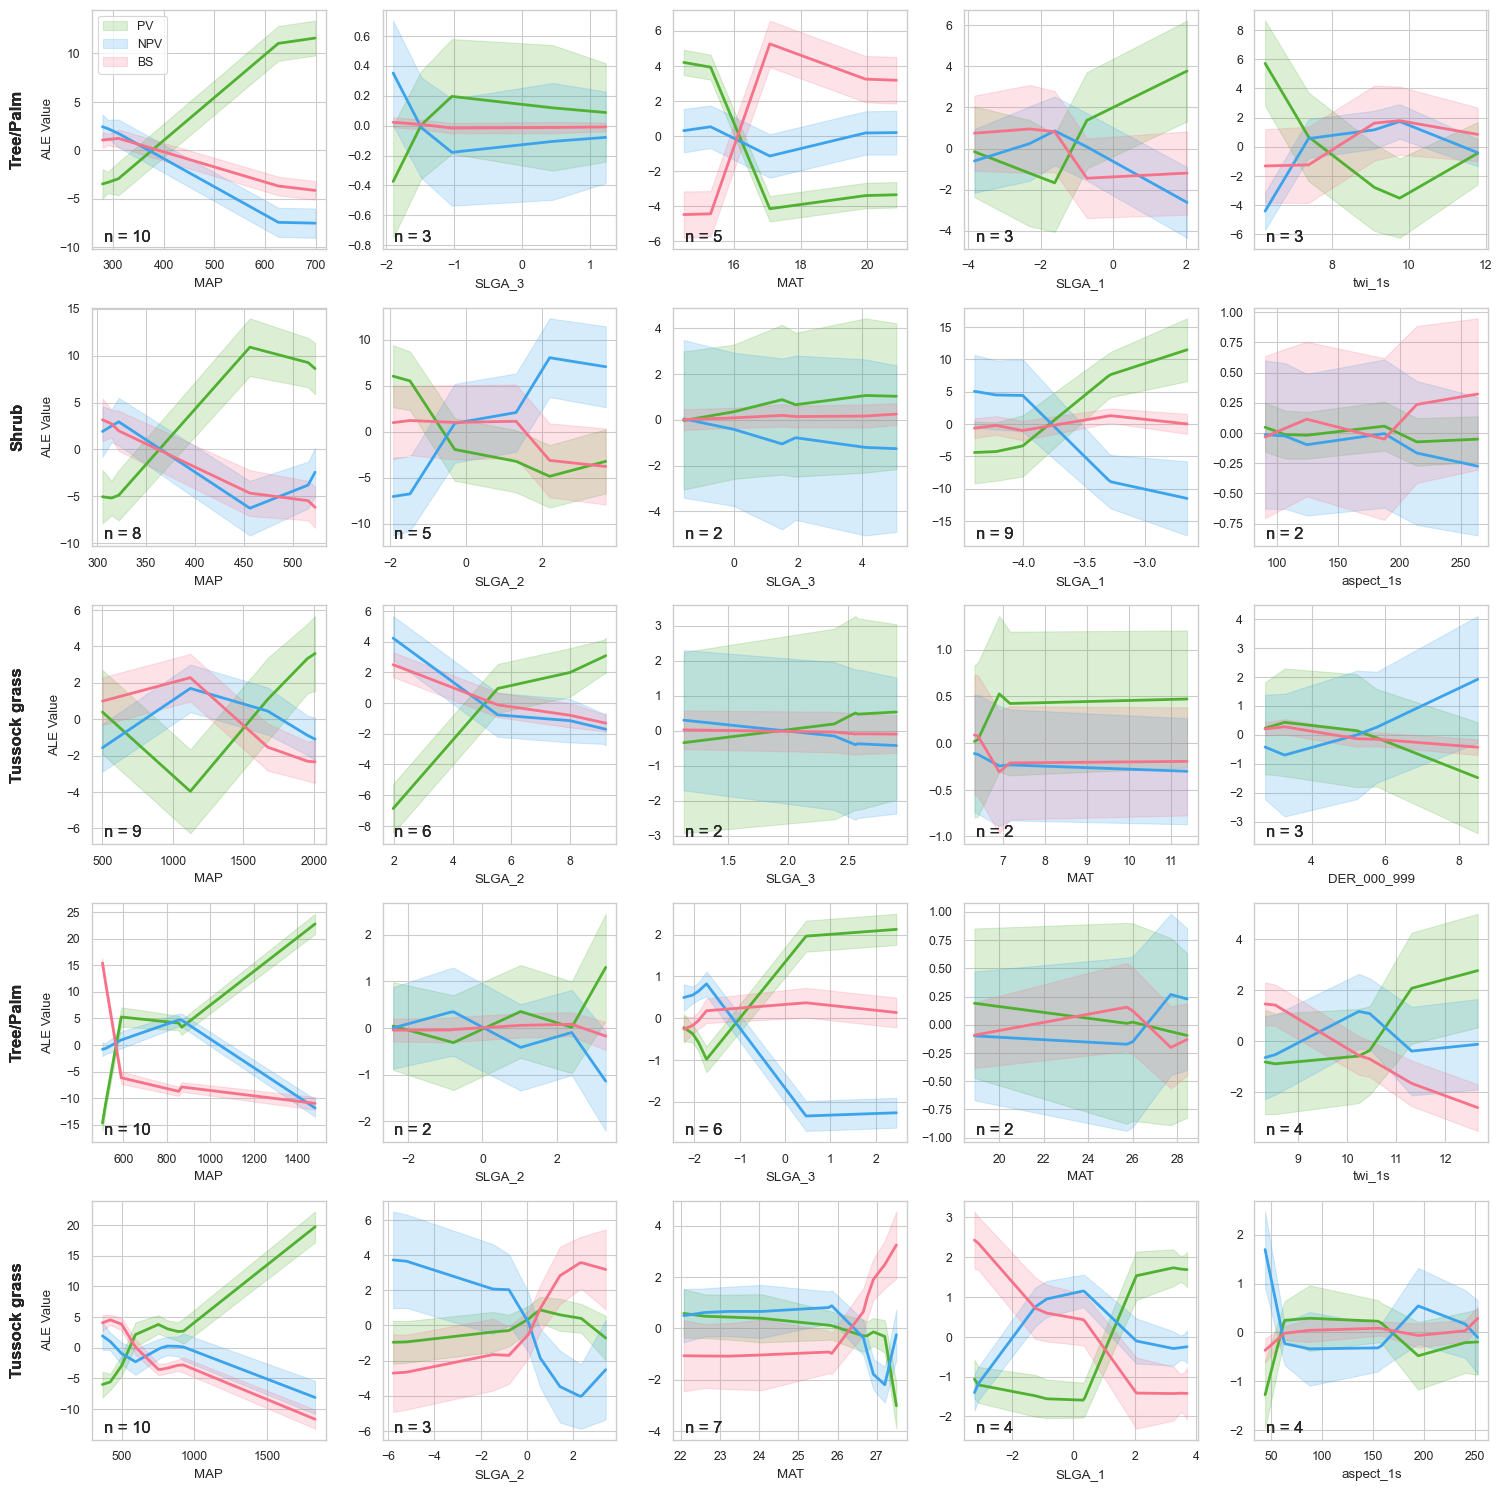

In [55]:


ncols = 5
nrows = 5
fig, axes = plt.subplots(ncols = ncols, nrows = nrows, figsize = (15, 15))

ordered_veg_list = ['Temp/Med Tree.Palm',          'Temp/Med Shrub',  
                    'Temp/Med Tussock.grass',      'Tropical/Savanna Tree.Palm', 
                    'Tropical/Savanna Tussock.grass']

# ordered_veg_list = ['Desert Forb',                 'Desert Chenopod', 'Desert Hummock.grass',
#                    'Desert Tree.Palm',            'Desert Shrub',    'Desert Tussock.grass',
#                    'Temp/Med Tree.Palm',          'Temp/Med Shrub',  'Temp/Med Tussock.grass',
#                    'Tropical/Savanna Tree.Palm',  'Tropical/Savanna Tussock.grass']

color_palette = [list(sns.color_palette("husl", 3))[1], list(sns.color_palette("husl", 3))[2], list(sns.color_palette("husl", 3))[0]]

# Iterate by plot grid ~ ncols corresponds to the number of variables to plot
#                      ~ nrows corresponds to the number of veg group to plot 

# Add box for temp/Med
fig.text(-0.025, 0.70, 'Temperate/Med', fontsize=12, va='center', ha='center',
         bbox=dict(facecolor= color_palette[0], alpha=0.75, boxstyle="round,pad=0.5"), rotation=90, fontweight='bold')
#rect = Rectangle((-0.060, 0.4), 0.075, 0.60, transform=fig.transFigure,
#                 color= color_palette[0], alpha=0.5)
#fig.patches.append(rect)

# Add box for savanna/tropical
fig.text(-0.025, 0.20, 'Savanna/Tropical', fontsize=12, va='center', ha='center',
         bbox=dict(facecolor= color_palette[2], alpha=0.75, boxstyle="round,pad=0.5"), rotation=90, fontweight='bold')
#rect = Rectangle((-0.060, 0.0), 0.075, 0.40, transform=fig.transFigure,
#                 color= color_palette[2], alpha=0.5)
#fig.patches.append(rect)
# Iterate by plot grid ~ ncols corresponds to the number of variables to plot
#                      ~ nrows corresponds to the number of veg group to plot 

taken_variable = []
veg_group_idx = 0
for i, ax in enumerate(axes.flat):
    
    
    # Set the veg group index
    #print(i % ncols)
   
    if i % ncols == 0 and i != 0:
        veg_group_idx += 1
        taken_variable = []
    print(veg_group_idx)
    
    # Read in the data and set the variable group 
    veg_group = ordered_veg_list[veg_group_idx]
    super_group_folder_name = '_'.join(veg_group.split('/')) 
    ALE_all_models_df = pd.read_csv(f'{results_dir}/Results_Visualisation/ALE_values_{super_group_folder_name}.csv')
    
    # Set the variable index
    
    possessed_variables = top_5_variables[veg_group]
    variable_col = i % ncols
    variable_priority = ordering_non_desert[variable_col]
    
    while variable_priority not in possessed_variables or variable_priority in taken_variable:
        variable_col += 1
        variable_priority = ordering_non_desert[variable_col]
        print(f'skip {variable_priority}')
        
    taken_variable.append(variable_priority)
    
    
    x_variable = variable_priority + '_feat_values'
    y_variable = variable_priority
    print(x_variable)

    # Iterate by fractional cover type 
    for color_idx, fraction in enumerate(TARGET):

        # Remove outliers in the x_variable 
        #print(ALE_all_models_df)
        fraction_ALE = ALE_all_models_df.loc[ALE_all_models_df['Target'] == fraction][[x_variable, y_variable, 'Model']].dropna()
        fraction_ALE_removed_outlier = fraction_ALE.sort_values(x_variable)

        # Perform gam
        gam_pred, conf_95 = perform_gam(fraction_ALE_removed_outlier, x_variable, y_variable)

        # Plotting the gam

        ax.plot(fraction_ALE_removed_outlier[x_variable], gam_pred, linewidth = 2, color = color_palette[color_idx])
        ax.fill_between(fraction_ALE_removed_outlier[x_variable], conf_95[:, 0],
                         conf_95[:, 1], alpha=0.2, label='95% CI', color = color_palette[color_idx])

        ax.set_xlabel(y_variable)
        
        veg_name = ' '.join(super_group_folder_name.split(" ")[1].split('.'))
        if veg_name == 'Tree Palm':
            veg_name = 'Tree/Palm'
        
        if i % ncols == 0:
            ax.set_ylabel('ALE Value')
            ax.text(-0.35, 0.5, veg_name,
                    transform=ax.transAxes, fontsize=12,
                    fontweight='bold', rotation=90,
                    va = 'center')

        if i == 0:
            handles = ax.get_legend_handles_labels()[0]
            new_labels = ['PV', 'NPV', 'BS']
            ax.legend(handles, new_labels)
            
        # Annotation
        number_of_models = len(np.unique(fraction_ALE_removed_outlier['Model']))
        ax.text(0.05, 0.08, f'n = {number_of_models}', transform=ax.transAxes, 
            fontsize=12, va='top')
        

plt.tight_layout()
fig.savefig(f'{plots_dir}/Total_Spatial_NonDeserts_ALE_Dependence_Plots.png')